In [43]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor




import warnings
warnings.filterwarnings('ignore')

In [3]:
start = "2009-01-01"
end = '2019-1-01'
coke = yf.download('KO',start,end)
pepsi = yf.download('PEP',start,end)
monster = yf.download('MNST',start,end)
nestle = yf.download('NSRGY',start,end)


apple = yf.download('AAPL',start,end)
microsoft = yf.download('MSFT',start,end)
google = yf.download('GOOGL',start,end)
sony = yf.download('SONY',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Fix the index
coke['Date'] = coke.index
pepsi['Date'] = pepsi.index
monster['Date'] = monster.index
nestle['Date'] = nestle.index

apple['Date'] = apple.index
microsoft['Date'] = microsoft.index
google['Date'] = google.index
sony['Date'] = sony.index

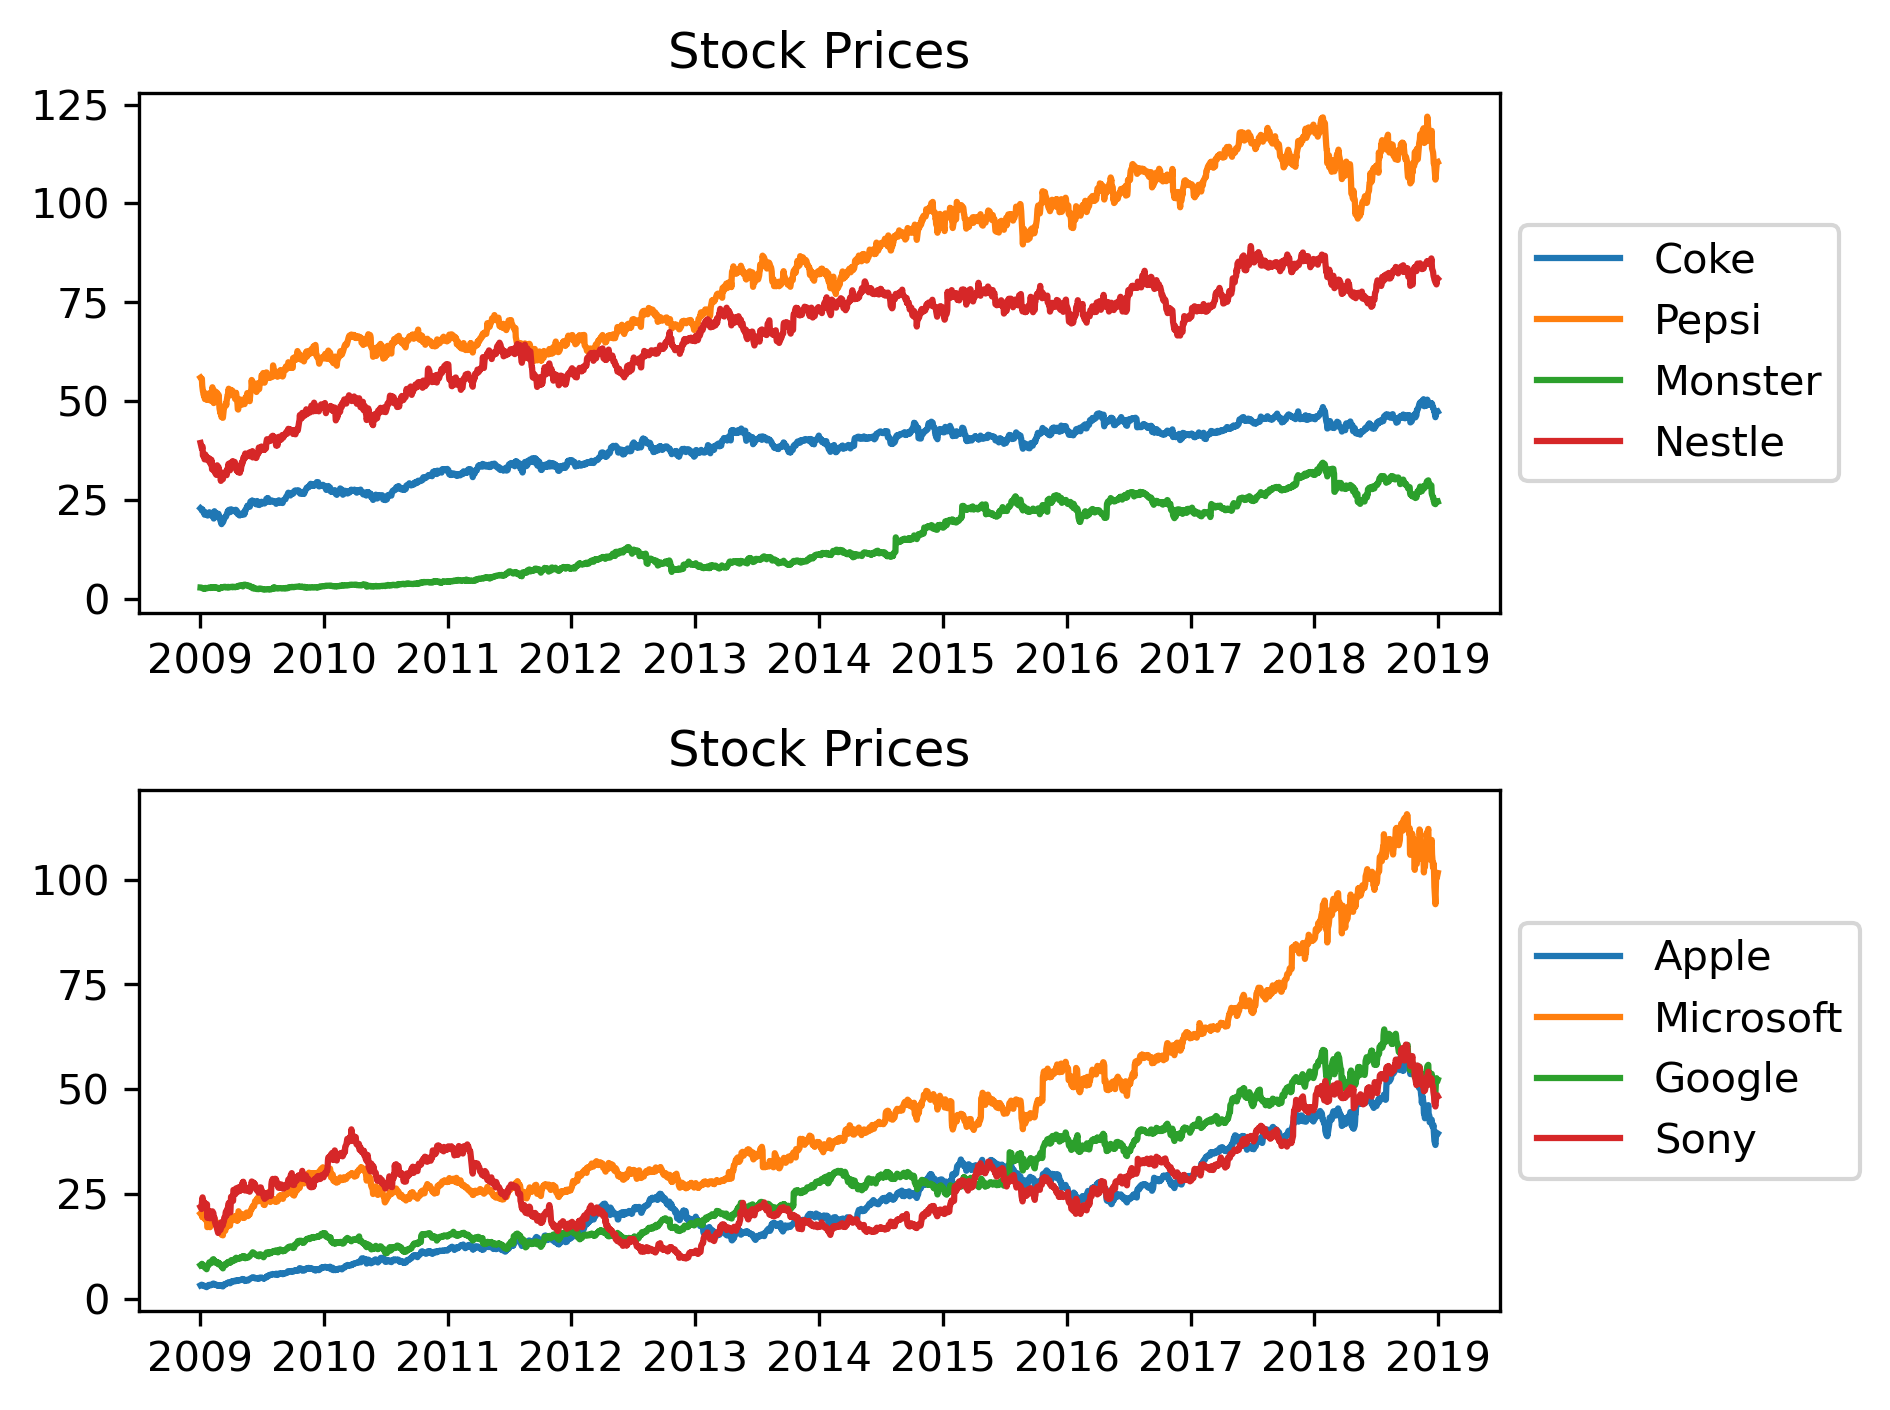

In [27]:
plt.figure(dpi=300)
plt.subplot(2, 1, 1)
plt.plot(coke['Close'], label='Coke')
plt.plot(pepsi['Close'], label='Pepsi')
plt.plot(monster['Close'], label='Monster')
plt.plot(nestle['Close'], label='Nestle')
plt.title('Stock Prices')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2, 1, 2)
plt.plot(apple['Close'], label='Apple')
plt.plot(microsoft['Close'], label='Microsoft')
plt.plot(google['Close'], label='Google')
plt.plot(sony['Close'], label='Sony')
plt.title('Stock Prices')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [6]:
def rolling_mean(data):
    data['MA50'] = data['Open'].rolling(50).mean()
    data['MA200'] = data['Open'].rolling(200).mean()
    data['Open'].plot(figsize = (15,7))
    data['MA50'].plot()
    data['MA200'].plot()
    plt.legend()

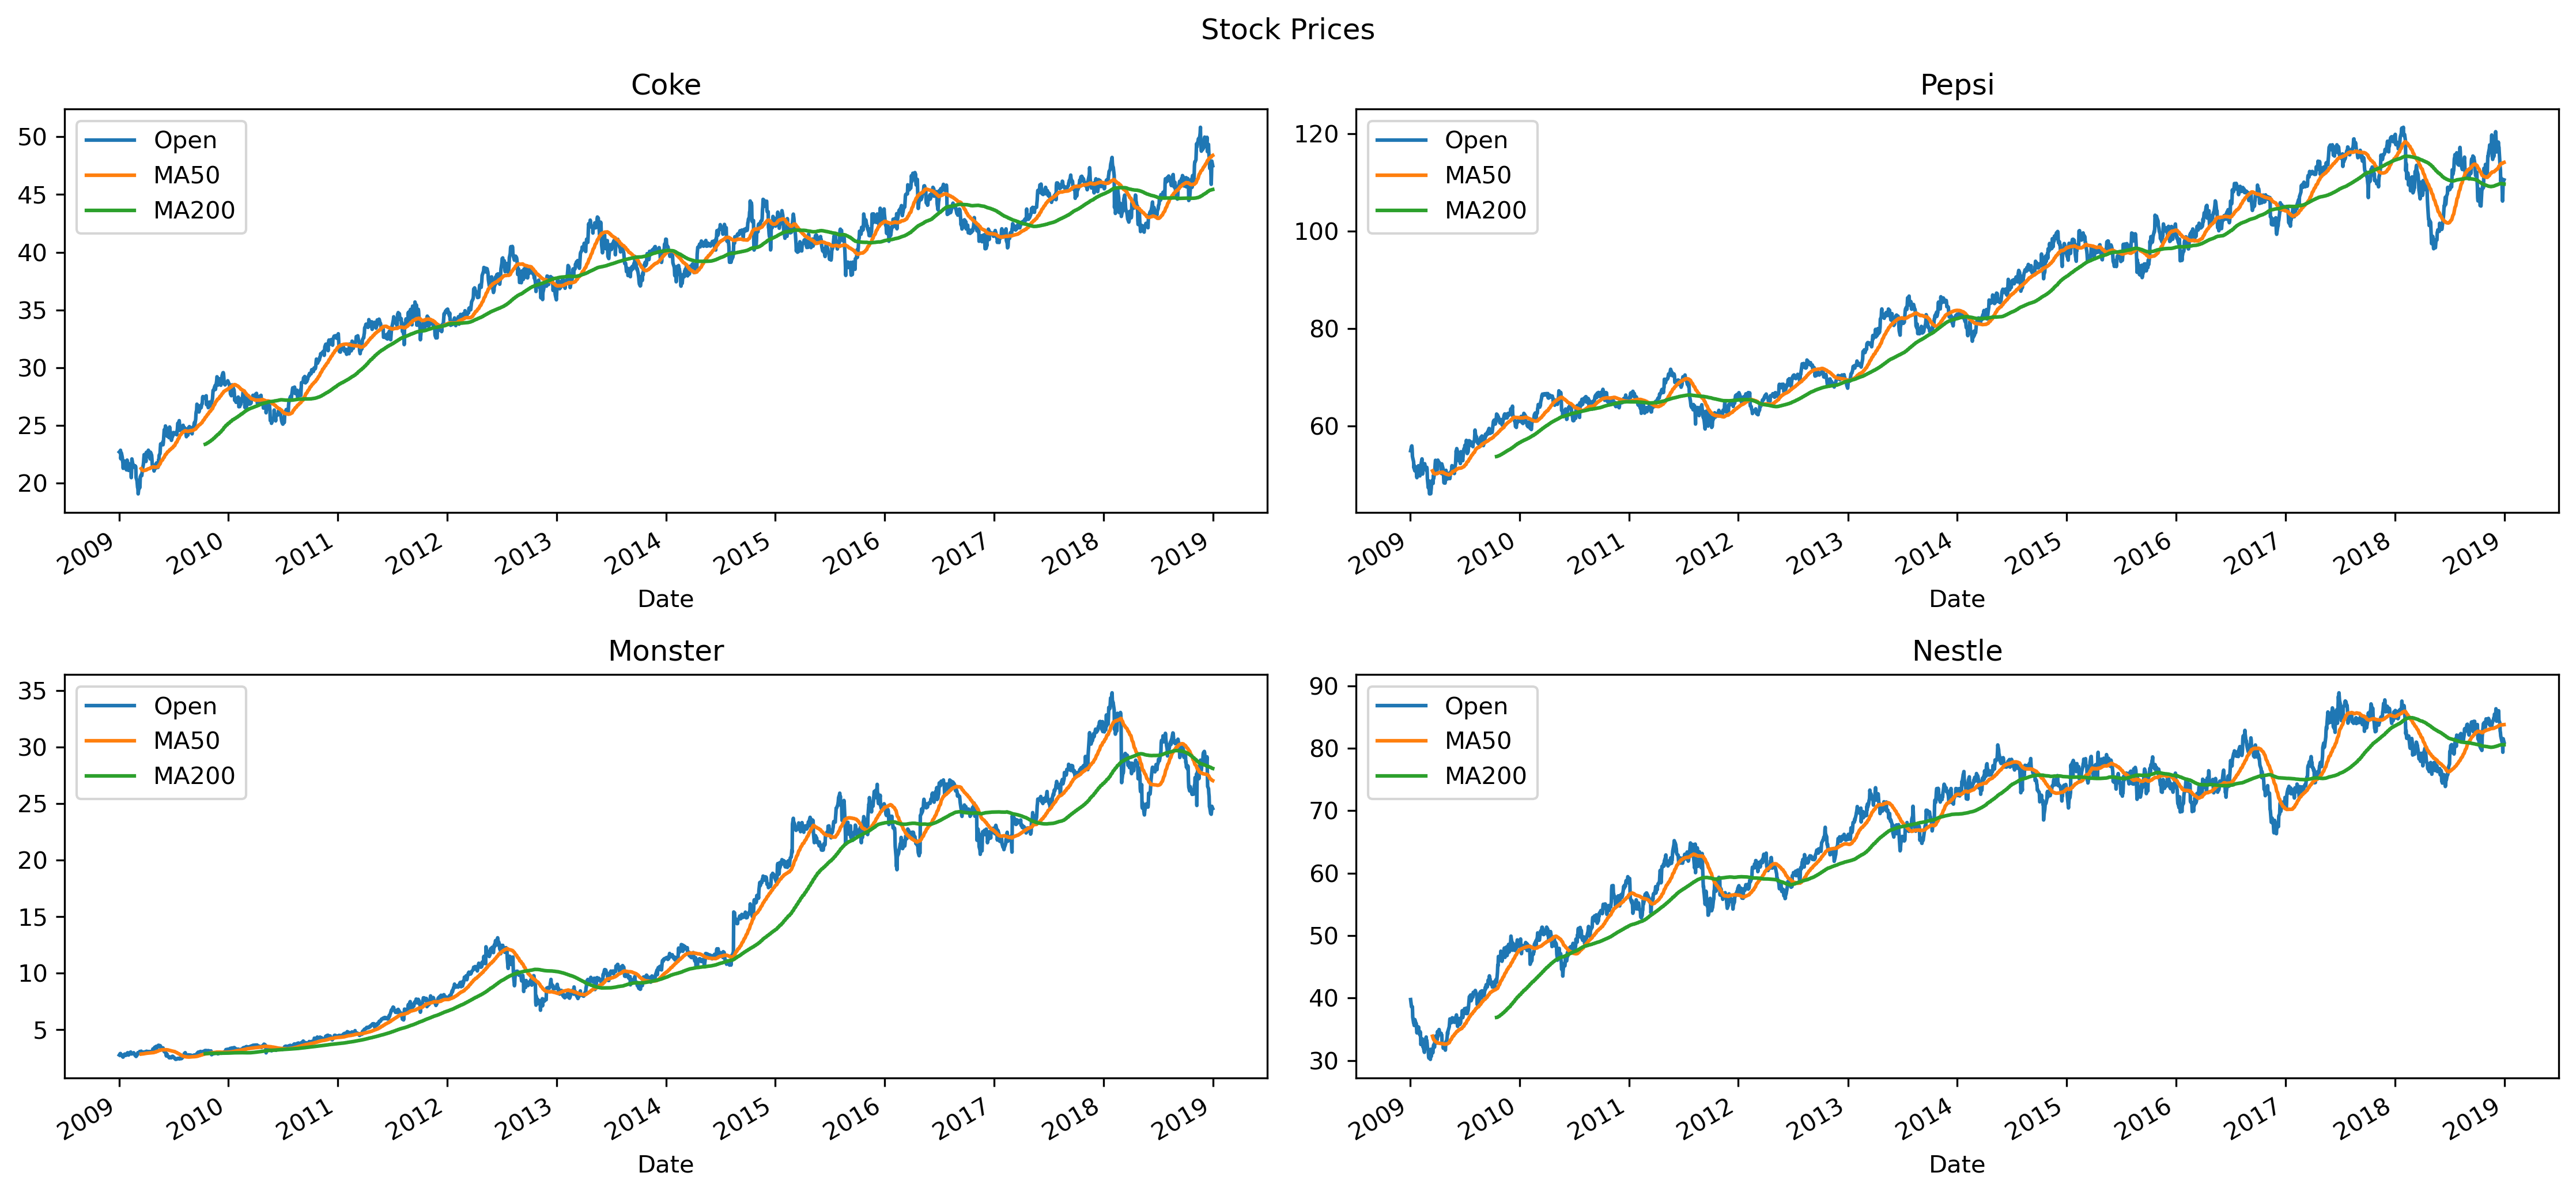

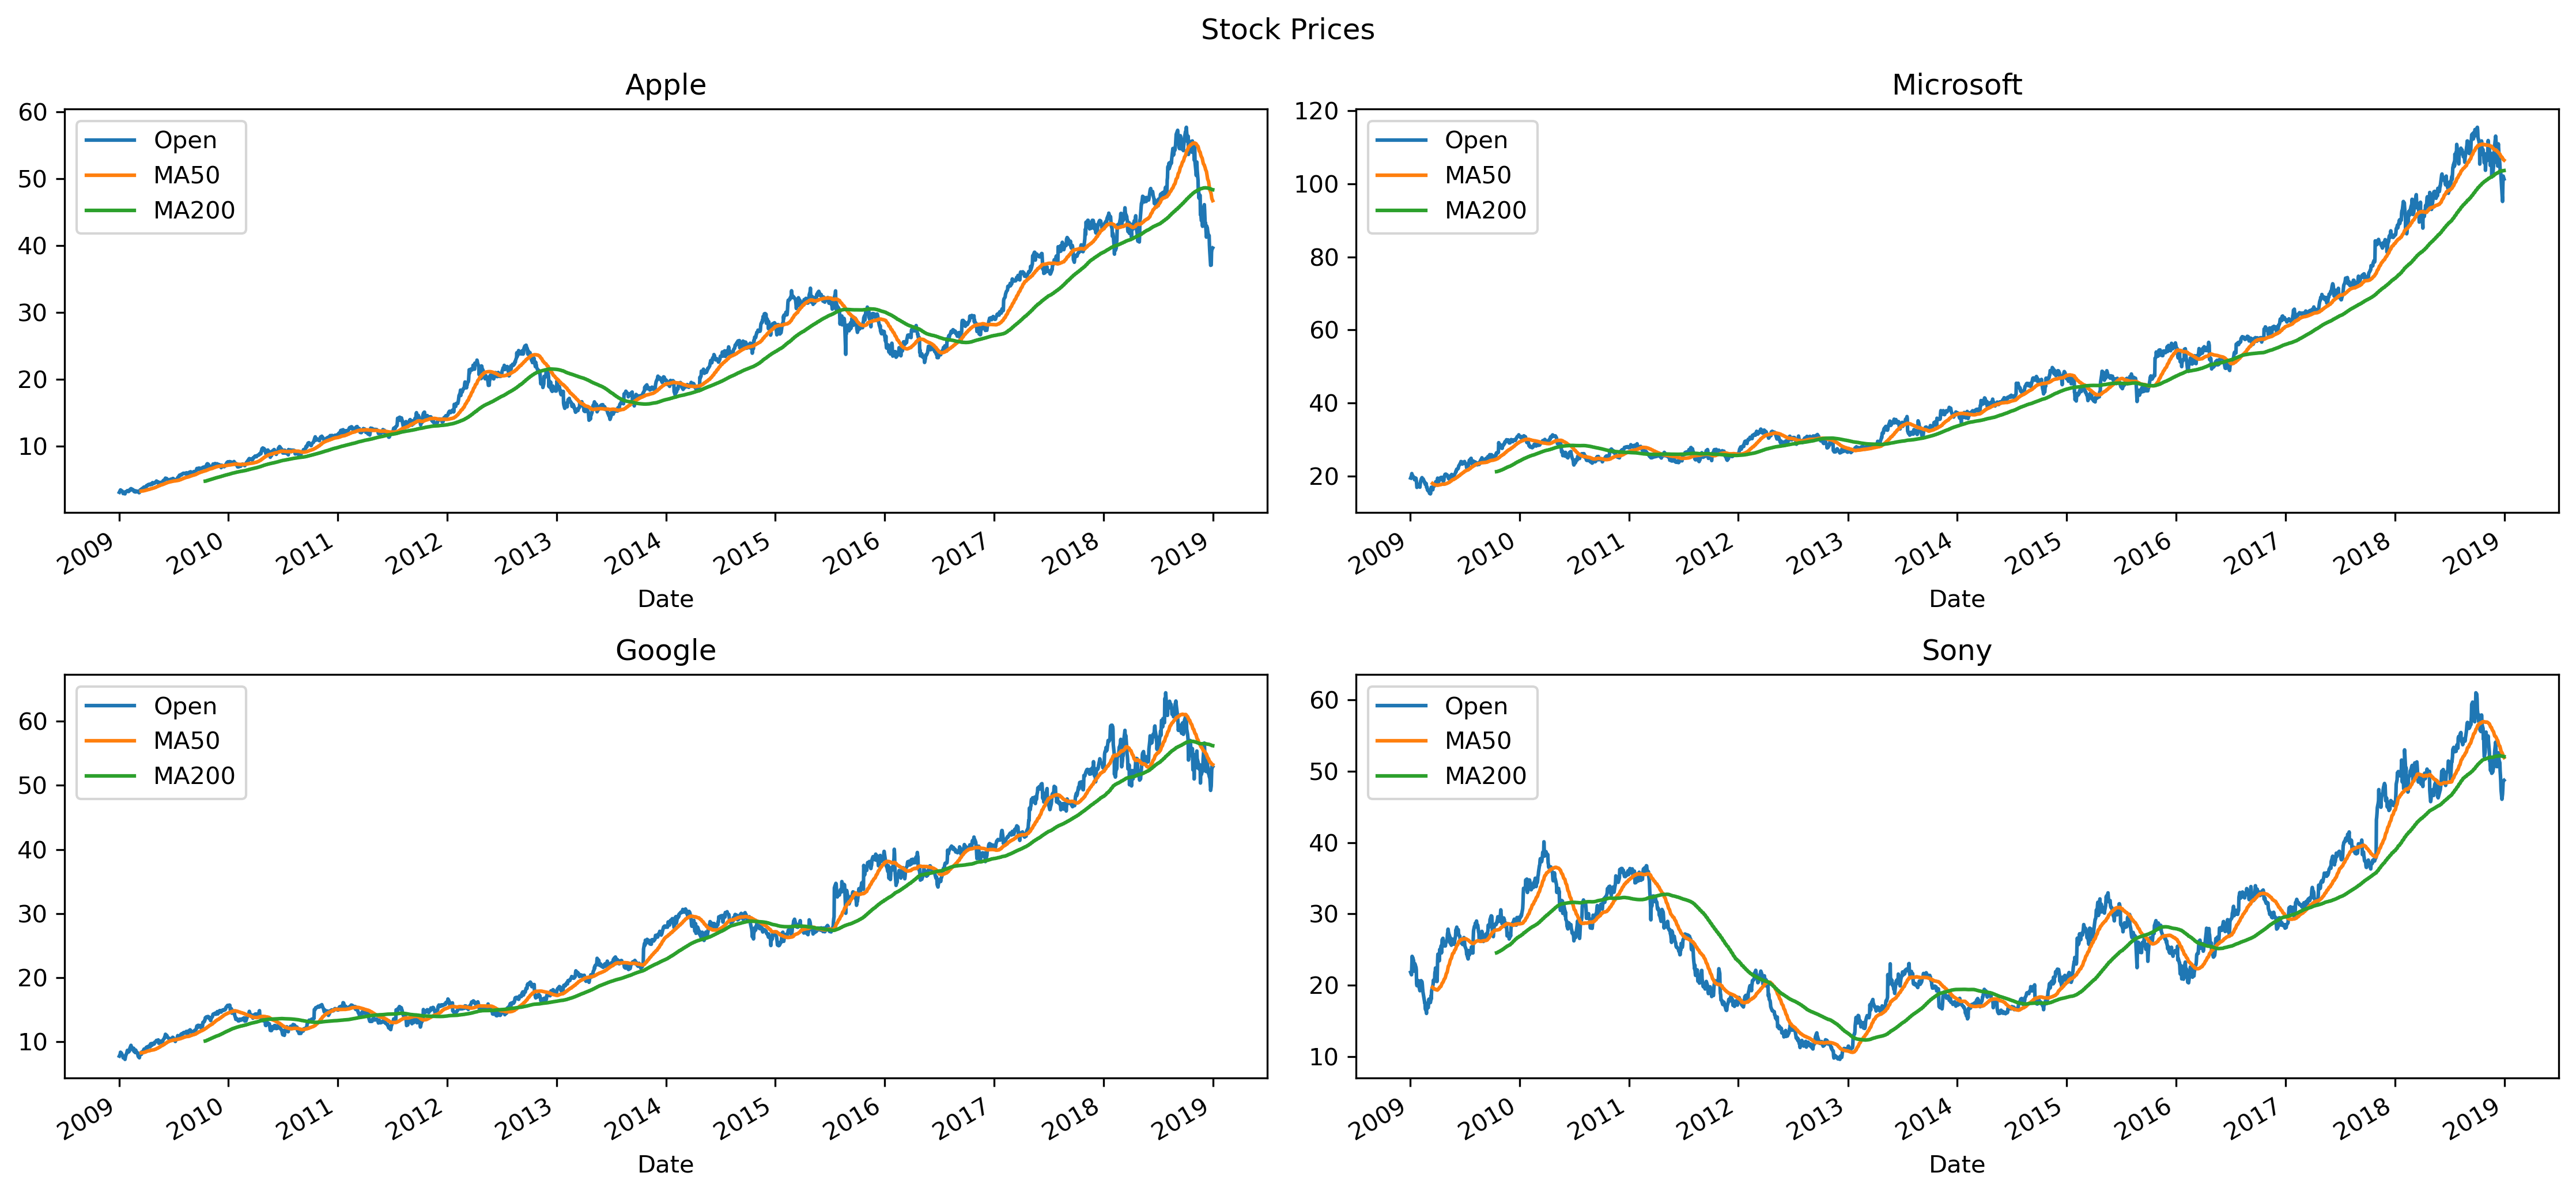

In [8]:
plt.figure(dpi=300)
plt.subplot(2, 2, 1)
rolling_mean(coke)
plt.title('Coke')

plt.subplot(2, 2, 2)
rolling_mean(pepsi)
plt.title('Pepsi')

plt.subplot(2, 2, 3)
rolling_mean(monster)
plt.title('Monster')

plt.subplot(2, 2, 4)
rolling_mean(nestle)
plt.title('Nestle')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()

plt.figure(dpi=300)
plt.subplot(2, 2, 1)
rolling_mean(apple)
plt.title('Apple')

plt.subplot(2, 2, 2)
rolling_mean(microsoft)
plt.title('Microsoft')

plt.subplot(2, 2, 3)
rolling_mean(google)
plt.title('Google')

plt.subplot(2, 2, 4)
rolling_mean(sony)
plt.title('Sony')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='AppleOpen', ylabel='AppleOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='AppleOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='AppleOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='AppleOpen'>],
       [<Axes: xlabel='AppleOpen', ylabel='MicrosoftOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='MicrosoftOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='MicrosoftOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='MicrosoftOpen'>],
       [<Axes: xlabel='AppleOpen', ylabel='GoogleOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='GoogleOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='GoogleOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='GoogleOpen'>],
       [<Axes: xlabel='AppleOpen', ylabel='SonyOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='SonyOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='SonyOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='SonyOpen'>]], dtype=object)

<Figure size 1920x1440 with 0 Axes>

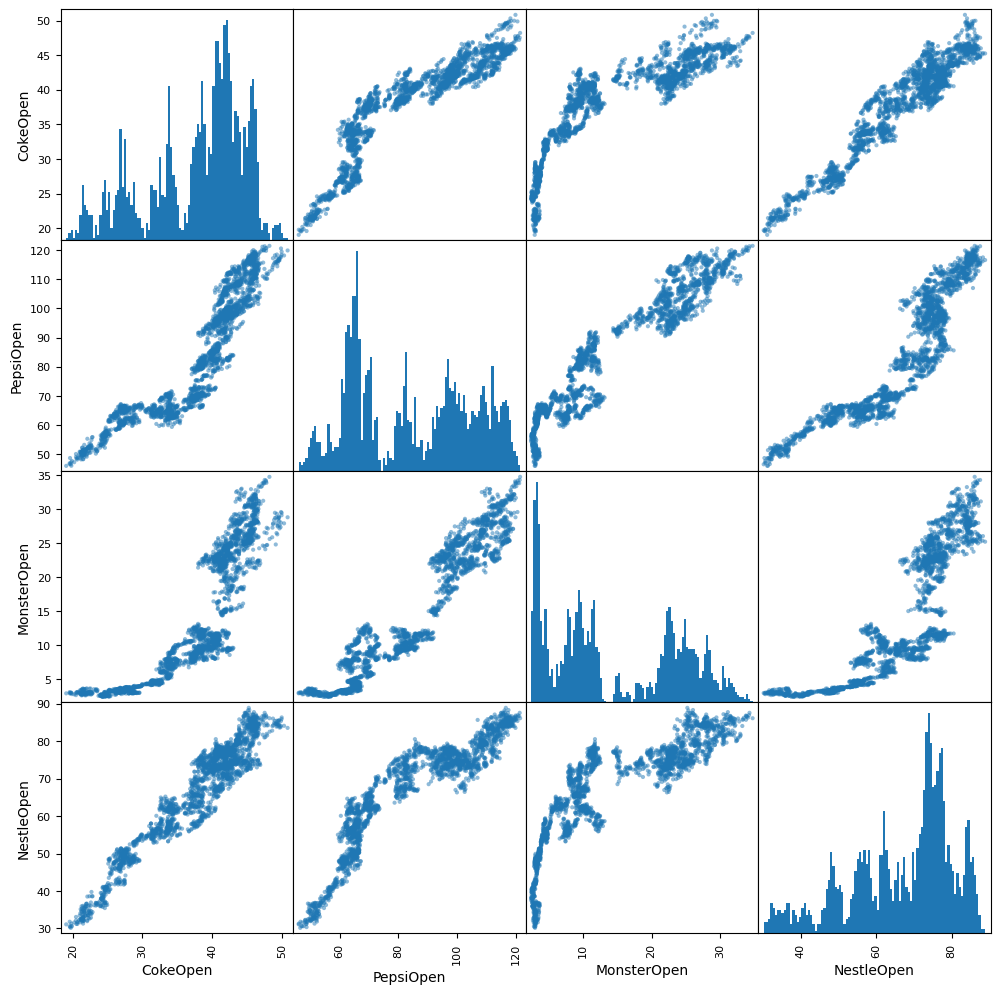

<Figure size 1920x1440 with 0 Axes>

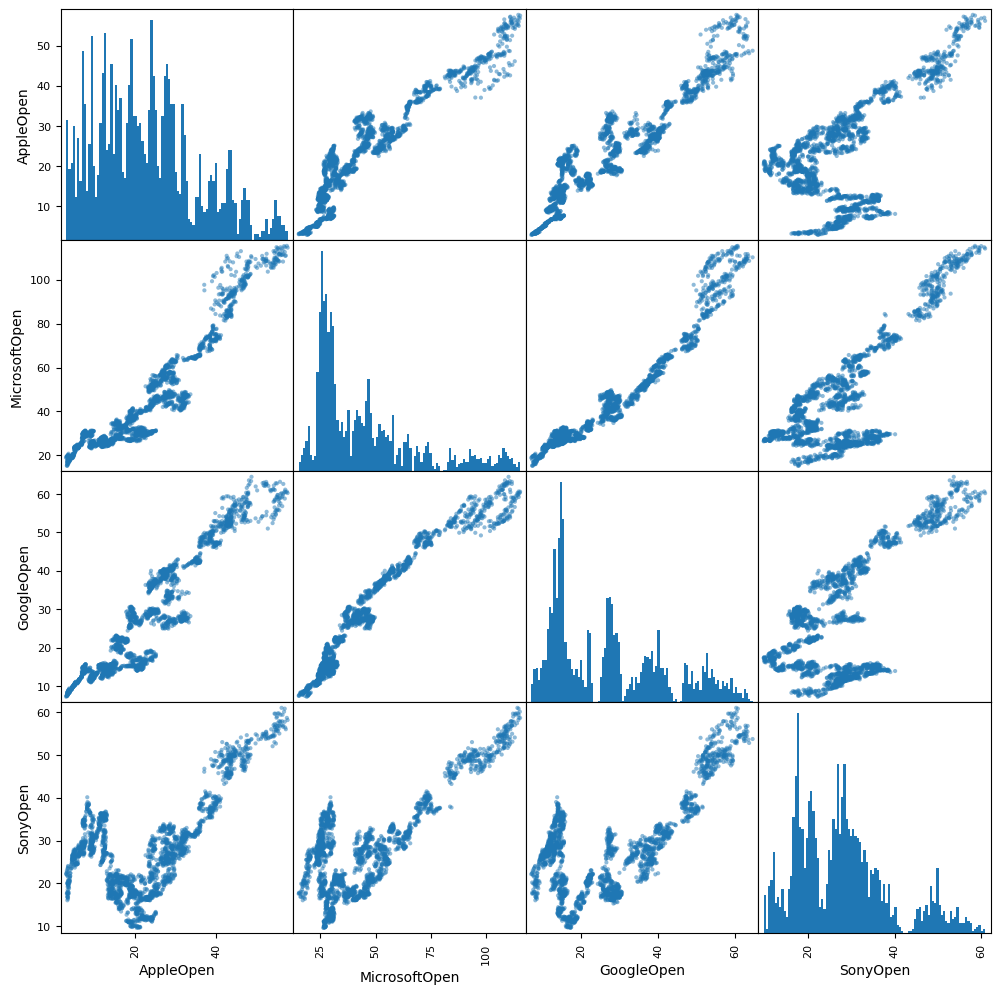

In [10]:
plt.figure(dpi=300)
data = pd.concat([coke['Open'],pepsi['Open'],monster['Open'],nestle['Open']],axis = 1)
data.columns = ['CokeOpen','PepsiOpen','MonsterOpen', 'NestleOpen']
scatter_matrix(data, figsize = (12,12), hist_kwds= {'bins':100})

plt.figure(dpi=300)
data = pd.concat([apple['Open'],microsoft['Open'],google['Open'],sony['Open']],axis = 1)
data.columns = ['AppleOpen','MicrosoftOpen','GoogleOpen', 'SonyOpen']
scatter_matrix(data, figsize = (12,12), hist_kwds= {'bins':100})

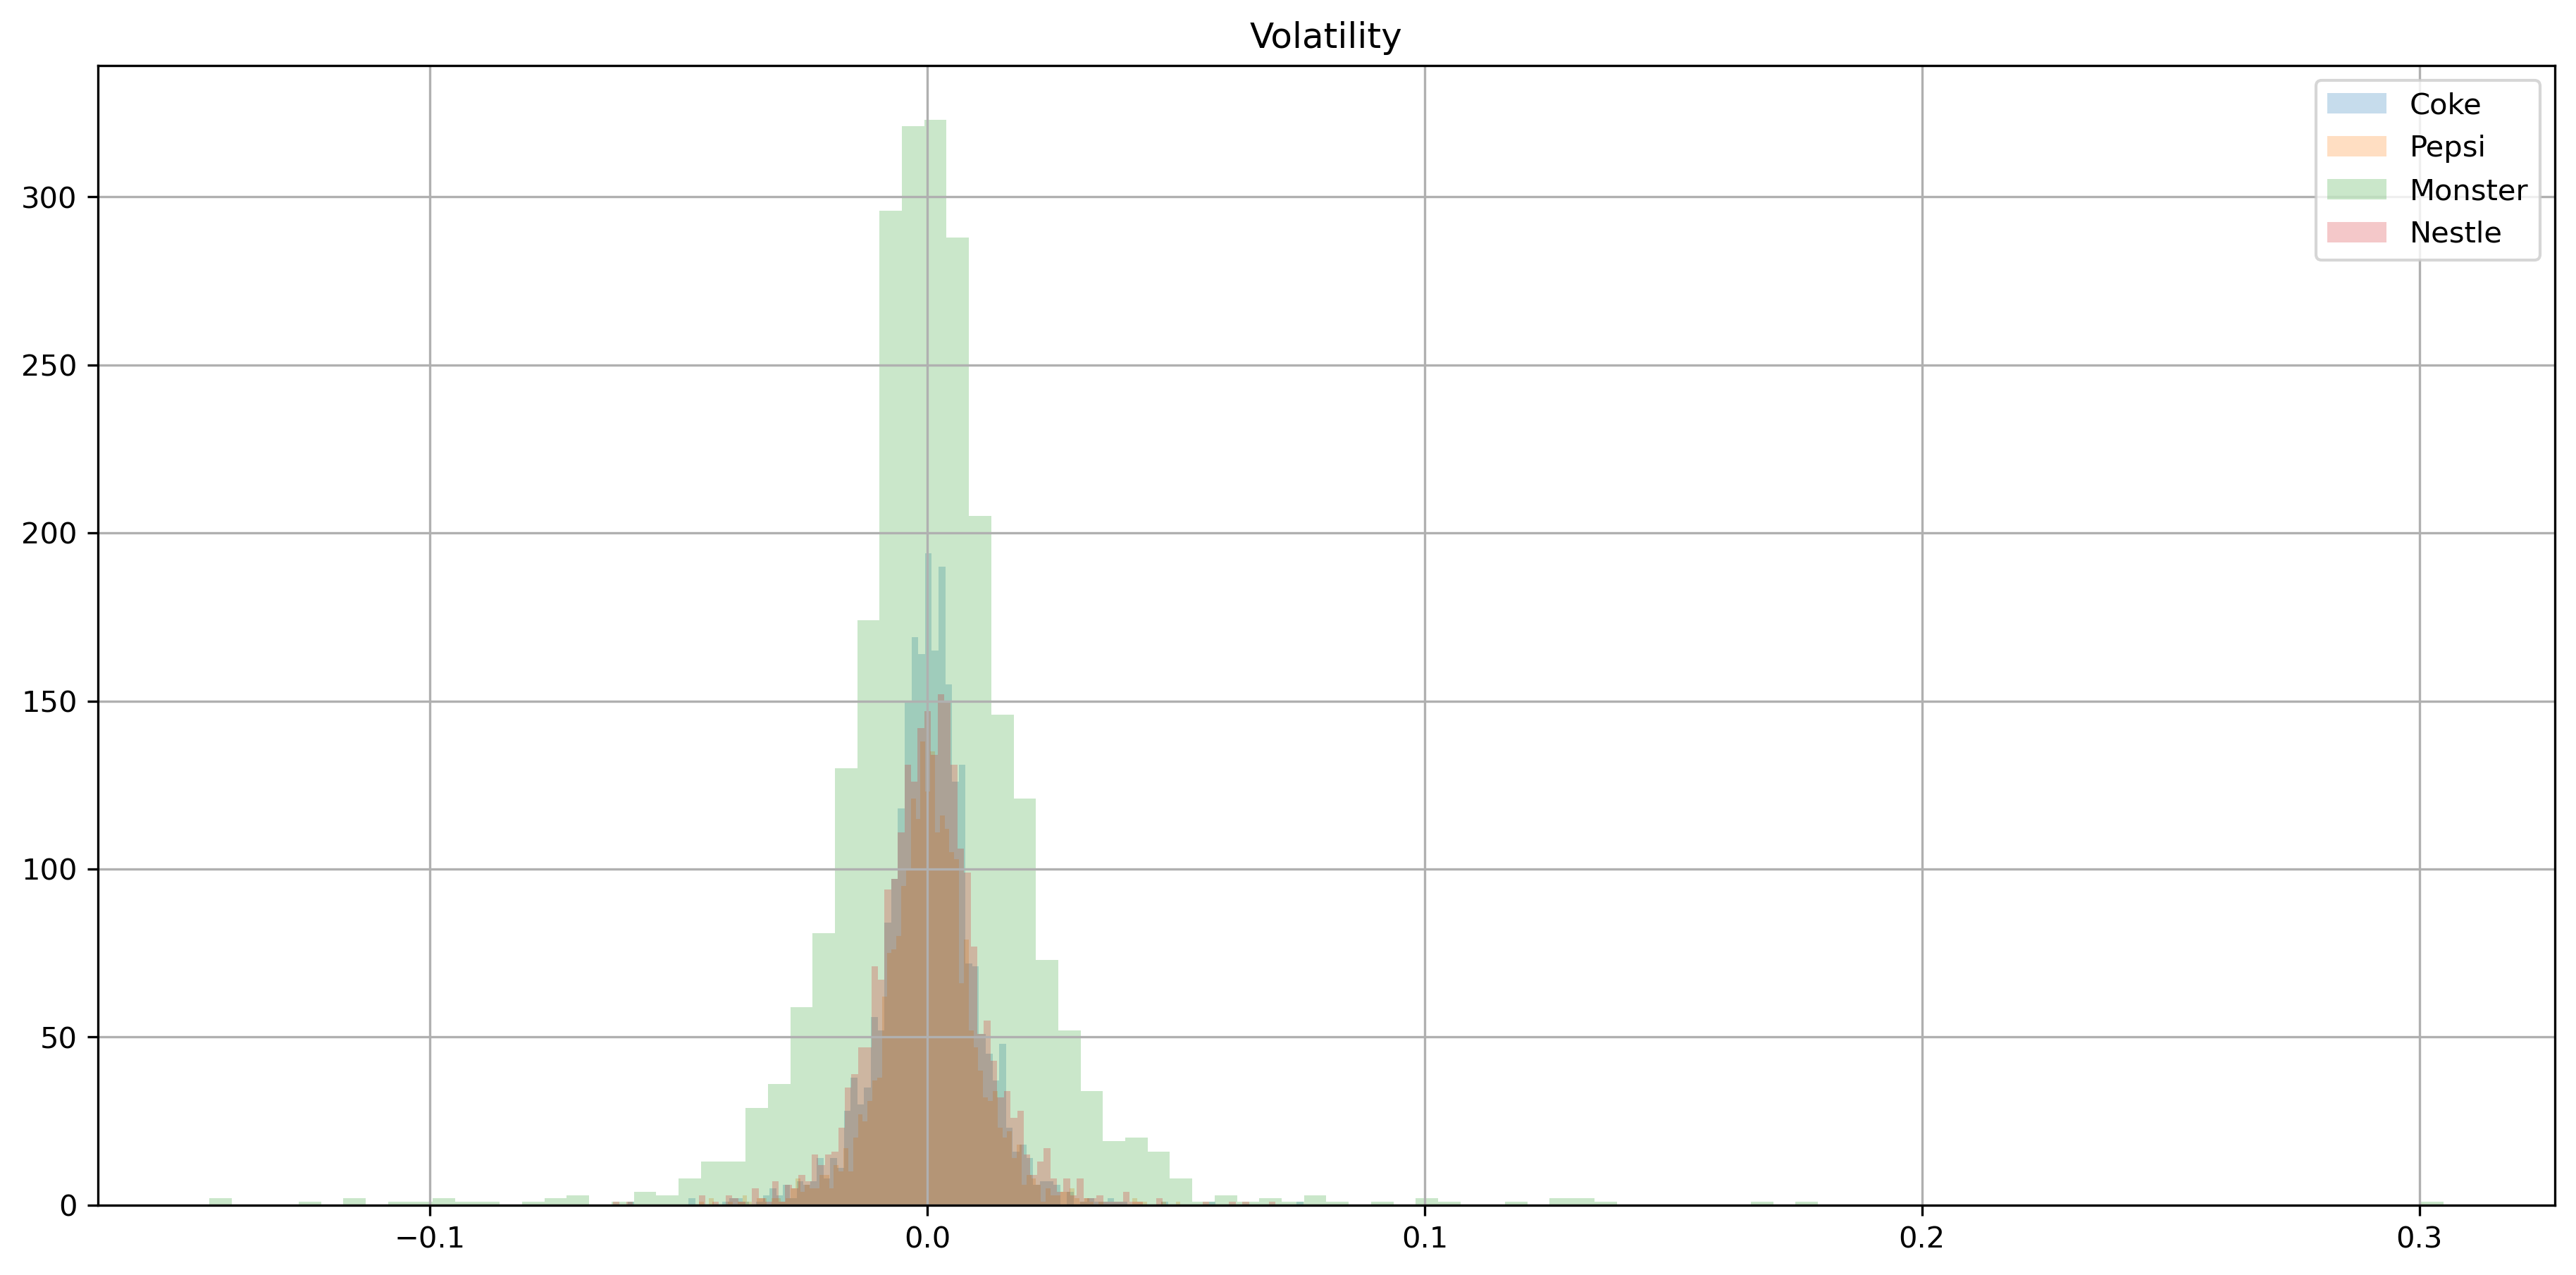

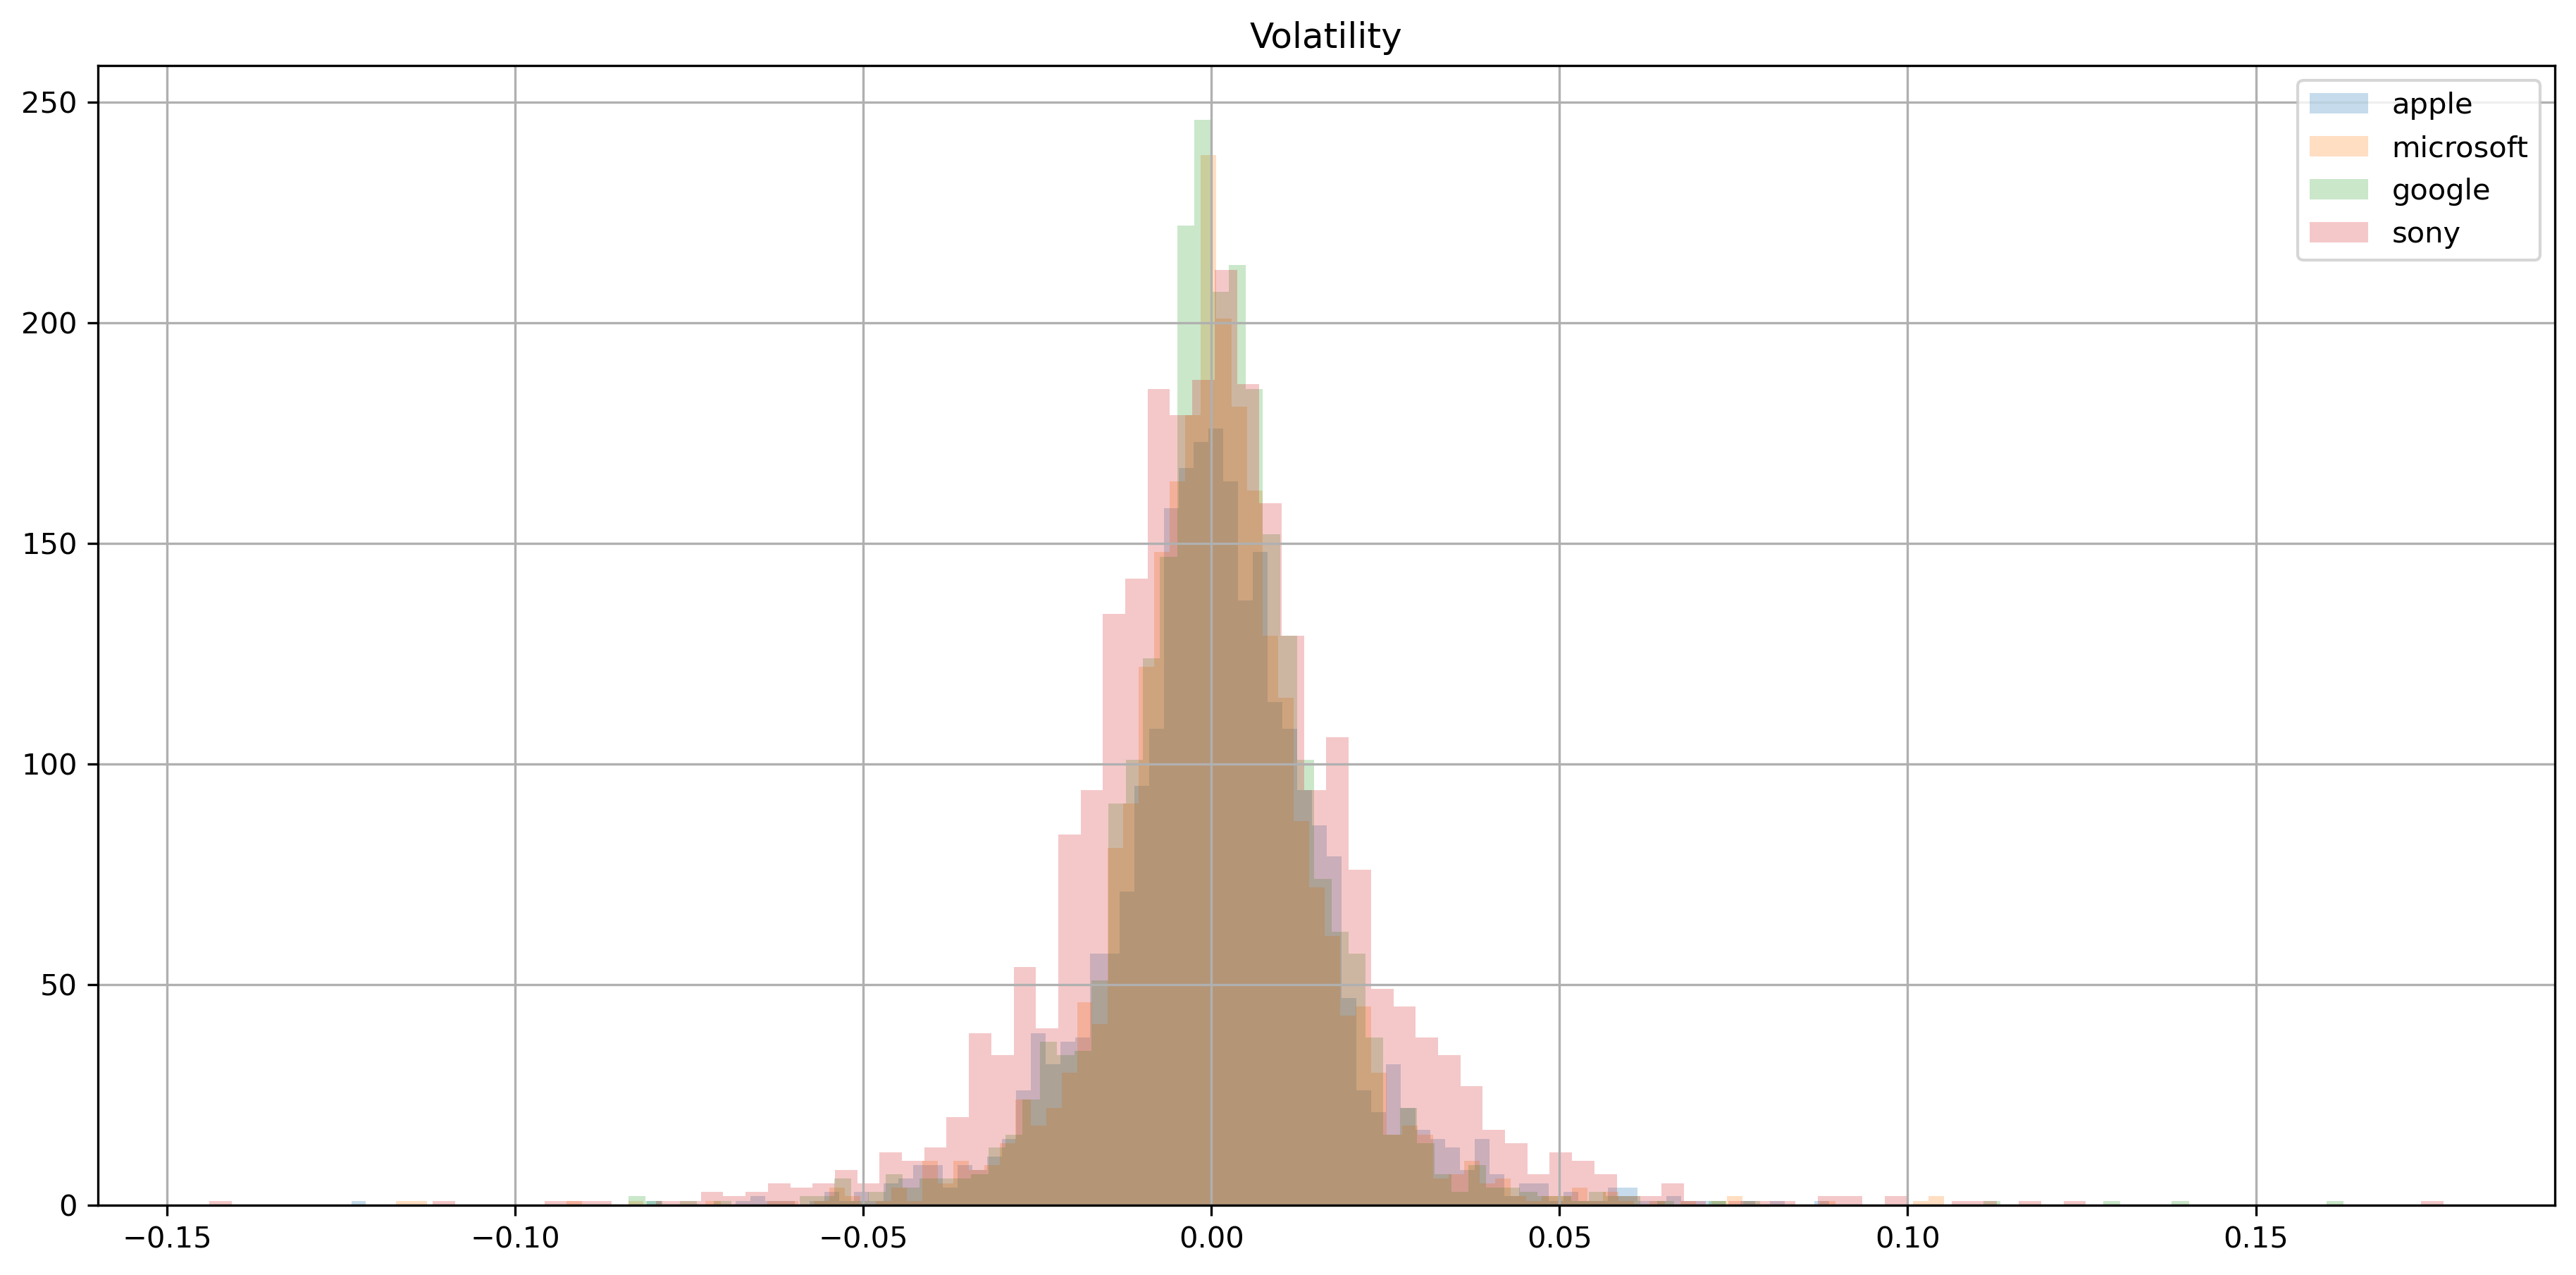

In [11]:
plt.figure(dpi=300)
#Volatility
coke['returns'] = (coke['Close']/coke['Close'].shift(1)) -1
pepsi['returns'] = (pepsi['Close']/pepsi['Close'].shift(1))-1
monster['returns'] = (monster['Close']/monster['Close'].shift(1)) - 1
nestle['returns'] = (nestle['Close']/nestle['Close'].shift(1)) -1
coke['returns'].hist(bins = 100, label = 'Coke', alpha = 0.25, figsize = (15,7))
pepsi['returns'].hist(bins = 100, label = 'Pepsi', alpha = 0.25)
monster['returns'].hist(bins = 100, label = 'Monster', alpha = 0.25)
nestle['returns'].hist(bins = 100, label = 'Nestle', alpha = 0.25)
plt.legend()
plt.title('Volatility')
plt.show()

plt.figure(dpi=300)
#Volatility
apple['returns'] = (apple['Close']/apple['Close'].shift(1)) -1
microsoft['returns'] = (microsoft['Close']/microsoft['Close'].shift(1))-1
google['returns'] = (google['Close']/google['Close'].shift(1)) - 1
sony['returns'] = (sony['Close']/sony['Close'].shift(1)) -1
apple['returns'].hist(bins = 100, label = 'apple', alpha = 0.25, figsize = (15,7))
microsoft['returns'].hist(bins = 100, label = 'microsoft', alpha = 0.25)
google['returns'].hist(bins = 100, label = 'google', alpha = 0.25)
sony['returns'].hist(bins = 100, label = 'sony', alpha = 0.25)
plt.legend()
plt.title('Volatility')
plt.show()


In [25]:
def ARIMA_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Find the best ARIMA model parameters using auto_arima
    auto_model = auto_arima(train['MA50'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    best_order = auto_model.order

    # Define function to evaluate ARIMA model
    def evaluate_arima_model(train, test, order):
        history = [x for x in train['MA50']]
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test['MA50'].iloc[t])
        error = mean_squared_error(test['MA50'], predictions)
        return error, predictions

    # Train the ARIMA model with the best parameters on the full dataset
    model = ARIMA(data['MA50'], order=best_order)
    model_fit = model.fit()

    # Forecast next year of stock prices
    forecast = model_fit.forecast(steps=365)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with ARIMA for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
new_start = '2018-10-19'
new_end = '2020-1-01'

new_coke = yf.download('KO',new_start,new_end)
new_pepsi = yf.download('PEP',new_start,new_end)
new_monster = yf.download('MNST',new_start,new_end)
new_nestle = yf.download('NSRGY',new_start,new_end)

new_apple = yf.download('AAPL',new_start,new_end)
new_microsoft = yf.download('MSFT',new_start,new_end)
new_google = yf.download('GOOGL',new_start,new_end)
new_sony = yf.download('SONY',new_start,new_end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


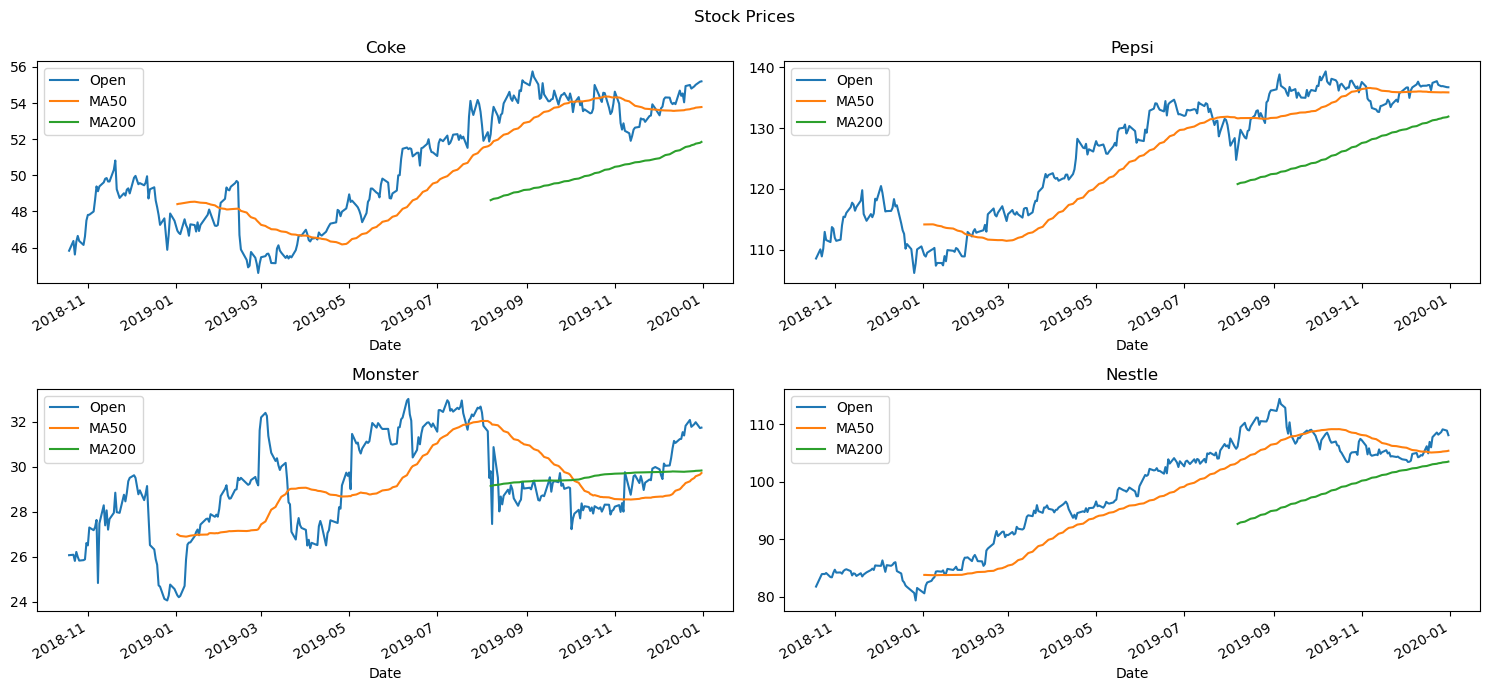

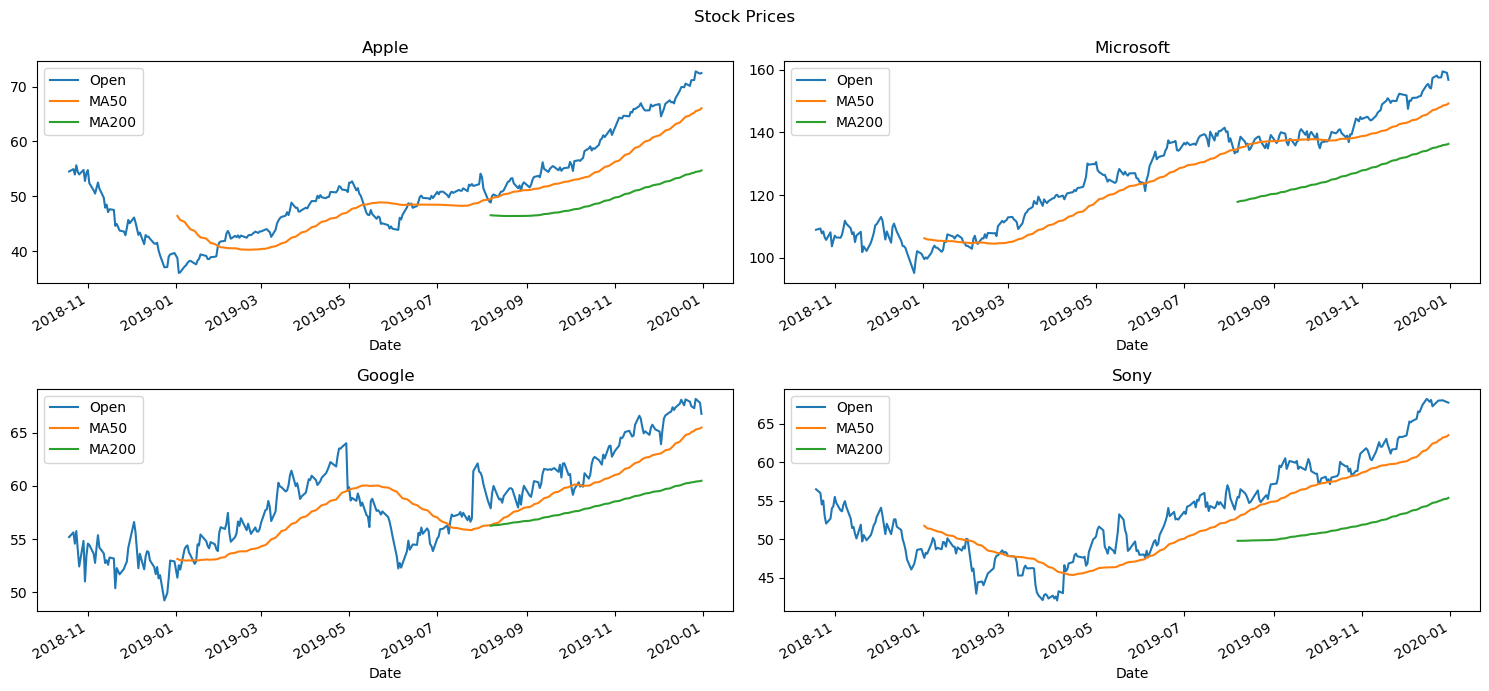

In [17]:
plt.subplot(2, 2, 1)
rolling_mean(new_coke)
plt.title('Coke')

plt.subplot(2, 2, 2)
rolling_mean(new_pepsi)
plt.title('Pepsi')

plt.subplot(2, 2, 3)
rolling_mean(new_monster)
plt.title('Monster')

plt.subplot(2, 2, 4)
rolling_mean(new_nestle)
plt.title('Nestle')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()

plt.subplot(2, 2, 1)
rolling_mean(new_apple)
plt.title('Apple')

plt.subplot(2, 2, 2)
rolling_mean(new_microsoft)
plt.title('Microsoft')

plt.subplot(2, 2, 3)
rolling_mean(new_google)
plt.title('Google')

plt.subplot(2, 2, 4)
rolling_mean(new_sony)
plt.title('Sony')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()


In [18]:
new_coke.iloc[:50, new_coke.columns.get_loc('MA50')] = coke['MA50'].tail(50).values
new_pepsi.iloc[:50, new_pepsi.columns.get_loc('MA50')] = pepsi['MA50'].tail(50).values
new_monster.iloc[:50, new_monster.columns.get_loc('MA50')] = monster['MA50'].tail(50).values
new_nestle.iloc[:50, new_nestle.columns.get_loc('MA50')] = nestle['MA50'].tail(50).values

new_apple.iloc[:50, new_apple.columns.get_loc('MA50')] = apple['MA50'].tail(50).values
new_microsoft.iloc[:50, new_microsoft.columns.get_loc('MA50')] = microsoft['MA50'].tail(50).values
new_google.iloc[:50, new_google.columns.get_loc('MA50')] = google['MA50'].tail(50).values
new_sony.iloc[:50, new_sony.columns.get_loc('MA50')] = sony['MA50'].tail(50).values


In [23]:
# Replace NaN values with the first non-NaN value
coke['MA50'].fillna(coke.at[coke['MA50'].first_valid_index(), 'MA50'], inplace=True)
pepsi['MA50'].fillna(pepsi.at[pepsi['MA50'].first_valid_index(), 'MA50'], inplace=True)
monster['MA50'].fillna(monster.at[monster['MA50'].first_valid_index(), 'MA50'], inplace=True)
nestle['MA50'].fillna(nestle.at[nestle['MA50'].first_valid_index(), 'MA50'], inplace=True)

apple['MA50'].fillna(apple.at[apple['MA50'].first_valid_index(), 'MA50'], inplace=True)
microsoft['MA50'].fillna(microsoft.at[microsoft['MA50'].first_valid_index(), 'MA50'], inplace=True)
google['MA50'].fillna(google.at[google['MA50'].first_valid_index(), 'MA50'], inplace=True)
sony['MA50'].fillna(sony.at[sony['MA50'].first_valid_index(), 'MA50'], inplace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-14614.840, Time=1.77 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14614.126, Time=0.29 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-14619.359, Time=0.35 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-14619.441, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14616.124, Time=0.25 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-14617.515, Time=0.81 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-14617.494, Time=1.07 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-14615.679, Time=2.68 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-14621.441, Time=1.88 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-14619.515, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-14619.495, Time=0.67 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-14621.358, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-14617.680, Time=0.47 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 11.094 sec

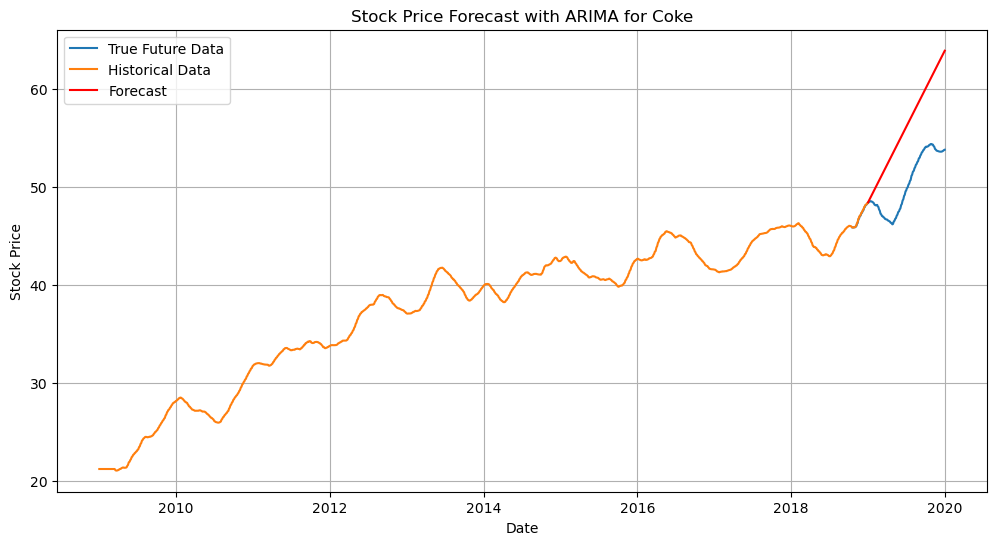

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11246.084, Time=2.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5298.713, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11237.868, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7558.877, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5000.171, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11247.518, Time=2.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8898.909, Time=2.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11237.904, Time=1.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11246.293, Time=1.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-9638.010, Time=2.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11241.745, Time=2.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11222.738, Time=1.74 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-11243.367, Time=0.77 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 21.863 seconds


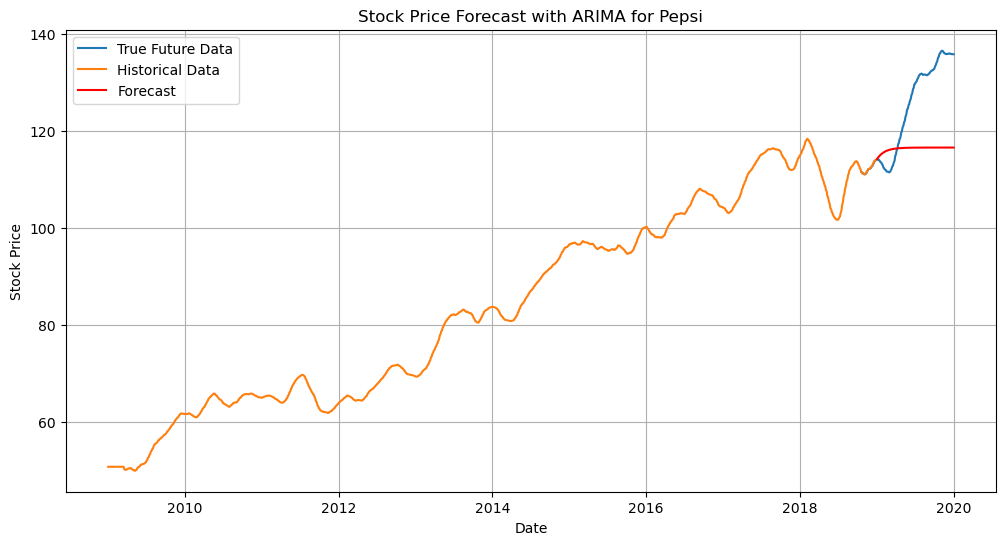

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-15364.281, Time=1.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-15355.866, Time=0.68 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-15360.495, Time=0.40 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-15360.560, Time=0.49 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-15357.820, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-15359.196, Time=0.57 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-15356.524, Time=2.65 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-15364.270, Time=0.99 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-15370.749, Time=2.78 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-15366.862, Time=0.74 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-15368.836, Time=1.97 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=-15368.827, Time=2.51 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-15367.866, Time=2.41 sec
 ARIMA(3,2,4)(0,0,0)[0] intercept   : AIC=-15366.804, Time=2.11 sec
 ARIM

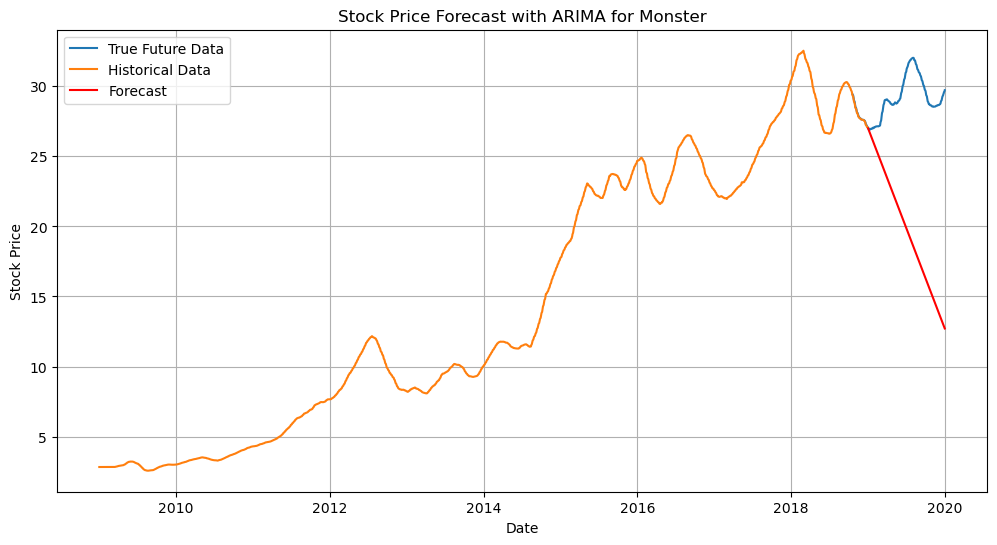

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-11243.552, Time=2.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-11232.789, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-11249.519, Time=0.23 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-11249.230, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-11234.788, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-11247.552, Time=0.41 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-11247.551, Time=0.82 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-11245.549, Time=0.53 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-11251.519, Time=0.37 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-11249.552, Time=0.58 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-11249.551, Time=0.35 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-11251.231, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-11247.549, Time=0.79 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 7.428 seco

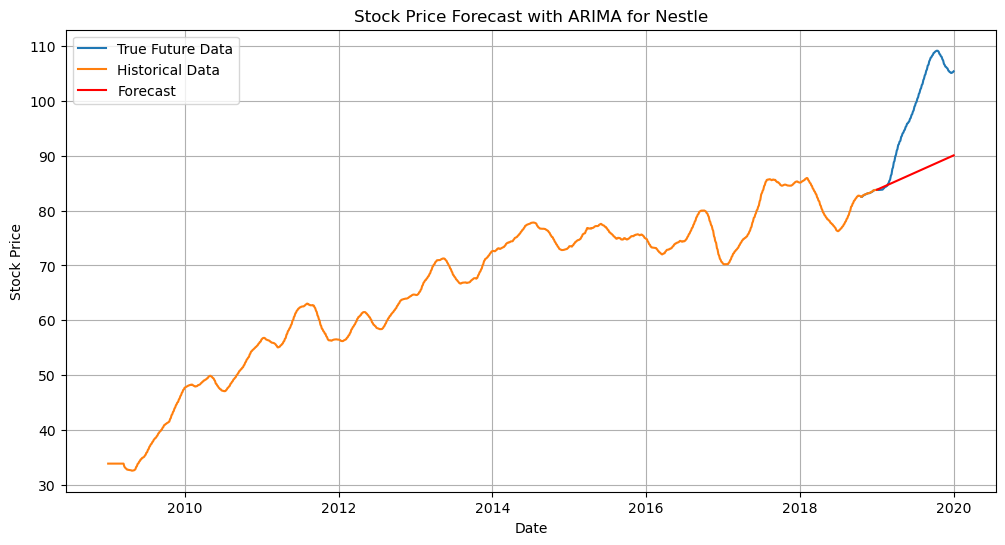

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-14414.911, Time=2.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14376.537, Time=0.31 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-14412.492, Time=0.32 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-14411.396, Time=0.51 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14378.521, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-14411.122, Time=2.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-14408.725, Time=1.91 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-14415.722, Time=2.22 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-14416.401, Time=2.47 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-14418.321, Time=1.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-14410.994, Time=1.17 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-14416.439, Time=3.10 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-14414.361, Time=1.67 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-14420.300, Time=0.69 sec
 ARIM

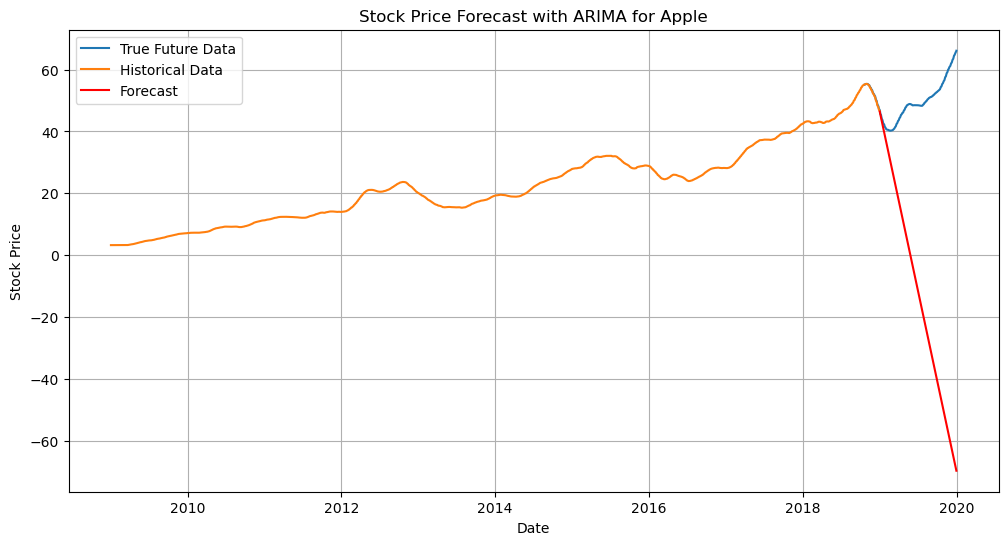

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-12351.824, Time=1.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-12356.784, Time=0.75 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-12355.558, Time=0.27 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-12355.529, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-12358.733, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-12353.161, Time=2.18 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 4.932 seconds


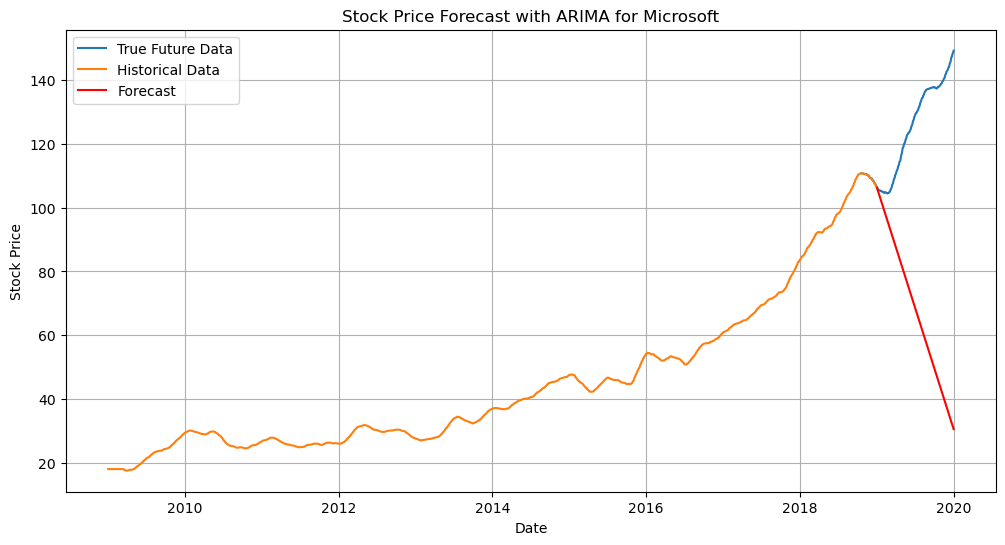

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-14043.607, Time=2.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14049.321, Time=0.39 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-14048.237, Time=0.61 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-14048.284, Time=0.59 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14051.309, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-14046.560, Time=1.14 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 4.962 seconds


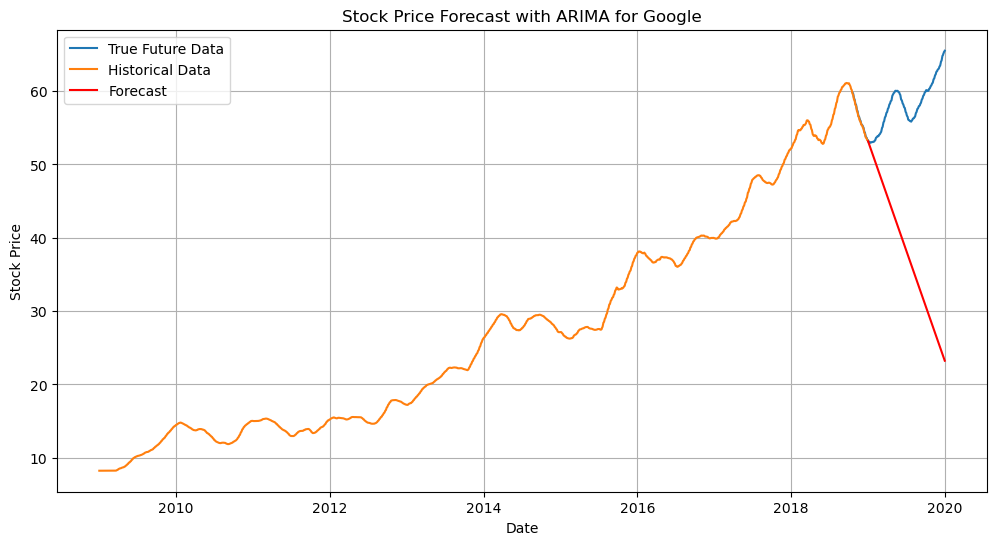

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-12942.869, Time=1.77 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-12936.133, Time=0.29 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-12943.424, Time=0.34 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-12943.348, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-12938.071, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-12941.439, Time=0.51 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-12941.420, Time=1.82 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-12939.421, Time=0.95 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-12945.369, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-12943.384, Time=0.93 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-12943.364, Time=0.26 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-12945.292, Time=0.26 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-12941.369, Time=0.59 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 8.368 seco

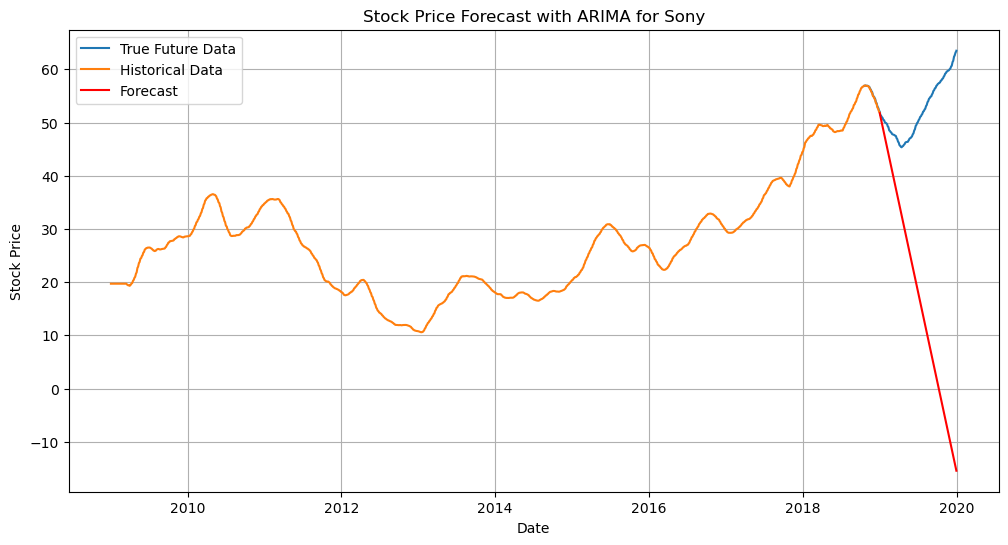

In [26]:
ARIMA_Function(coke, 'Coke', new_coke)
ARIMA_Function(pepsi, 'Pepsi', new_pepsi)
ARIMA_Function(monster, 'Monster', new_monster)
ARIMA_Function(nestle, 'Nestle', new_nestle)

ARIMA_Function(apple, 'Apple', new_apple)
ARIMA_Function(microsoft, 'Microsoft', new_microsoft)
ARIMA_Function(google, 'Google', new_google)
ARIMA_Function(sony, 'Sony', new_sony)

In [34]:
def SVM_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Train Support Vector Machine model
    svm_model = SVR(kernel='rbf')
    svm_model.fit(train.index.to_numpy().reshape(-1, 1), train['MA50'])

    # Predict using SVM model
    predictions = svm_model.predict(test.index.to_numpy().reshape(-1, 1))

    # Evaluate SVM model
    error = mean_squared_error(test['MA50'], predictions)

    # Forecast next year of stock prices
    forecast = svm_model.predict(pd.date_range(start=data.index[-1], periods=365, freq='D').to_numpy().reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with SVM for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


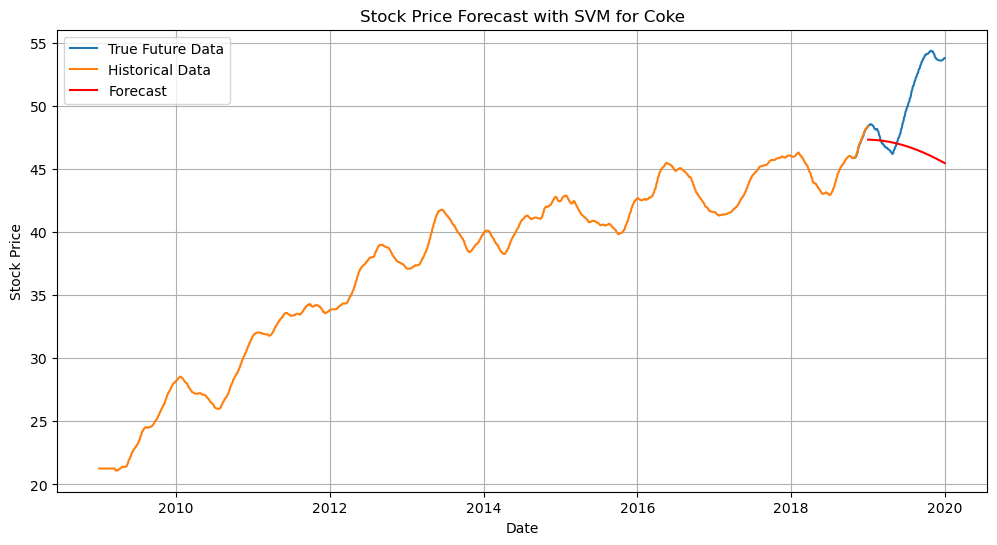

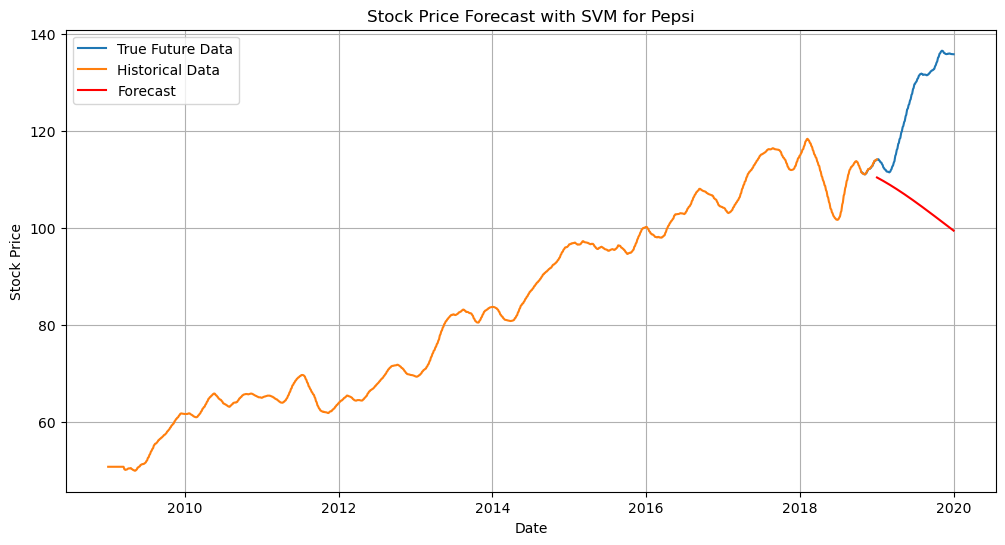

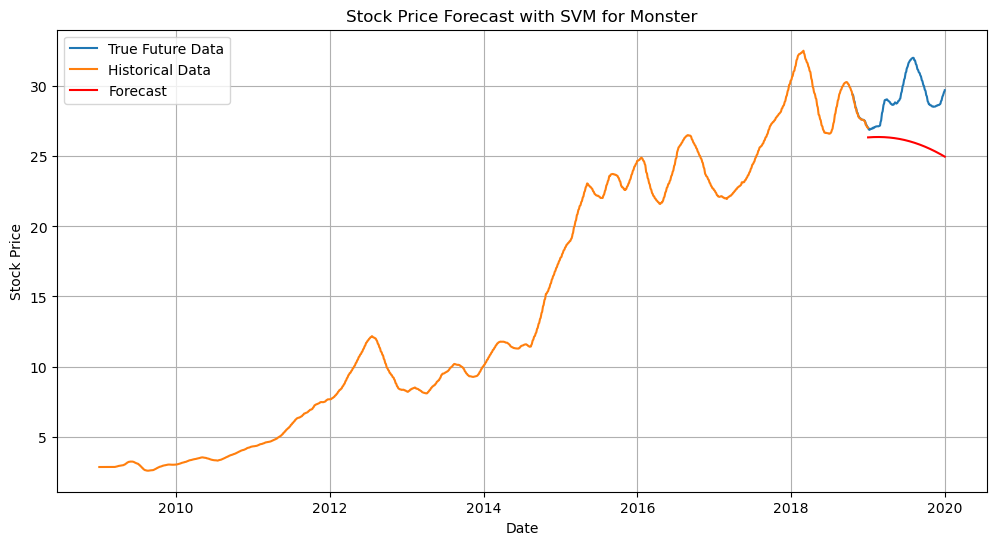

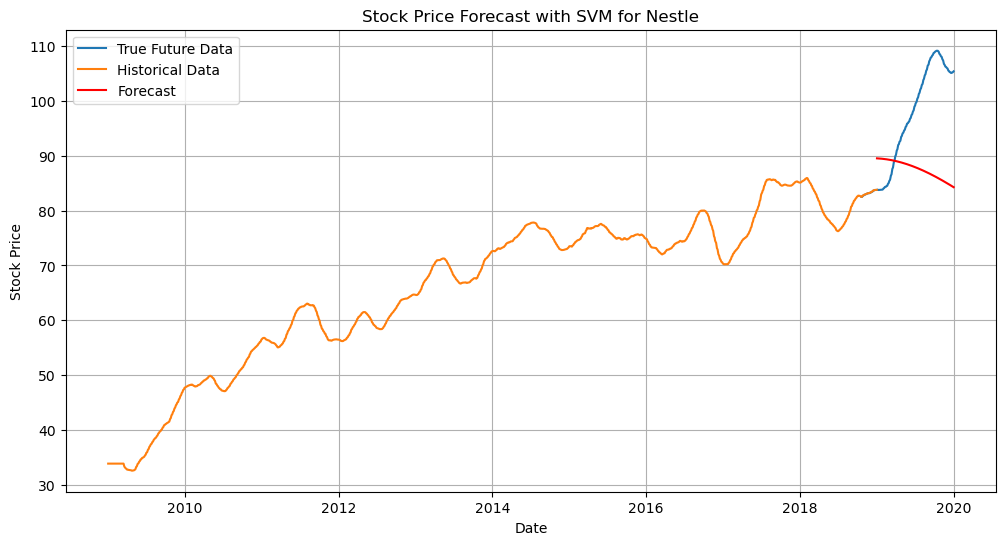

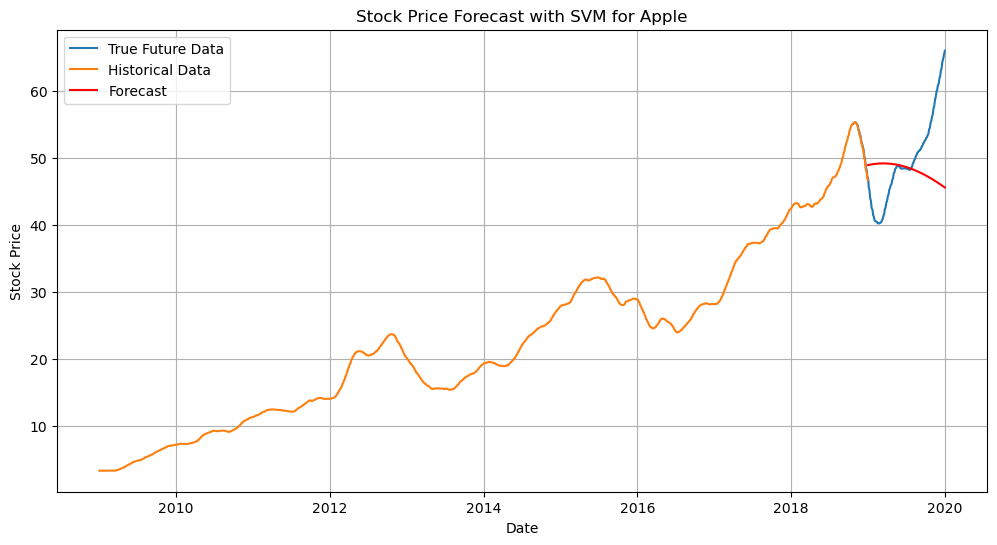

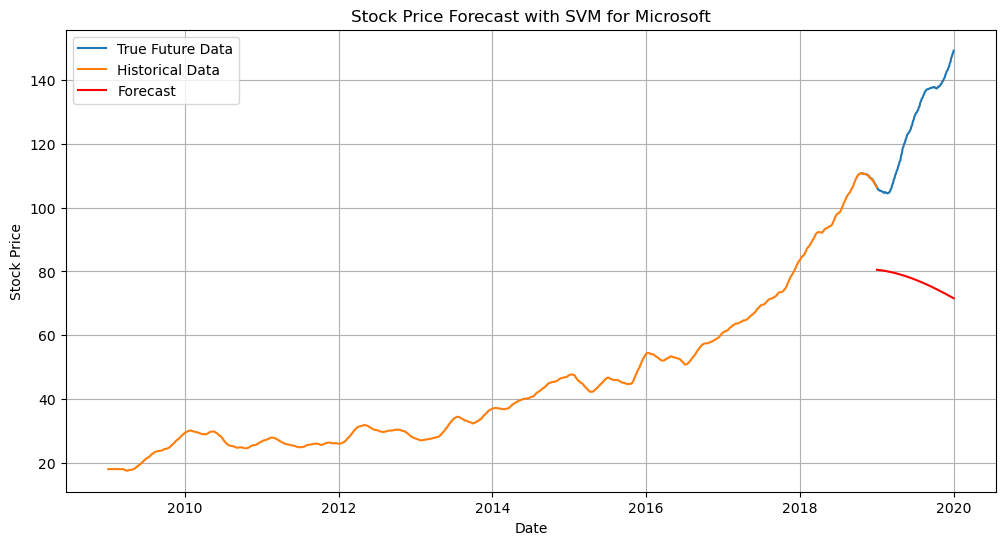

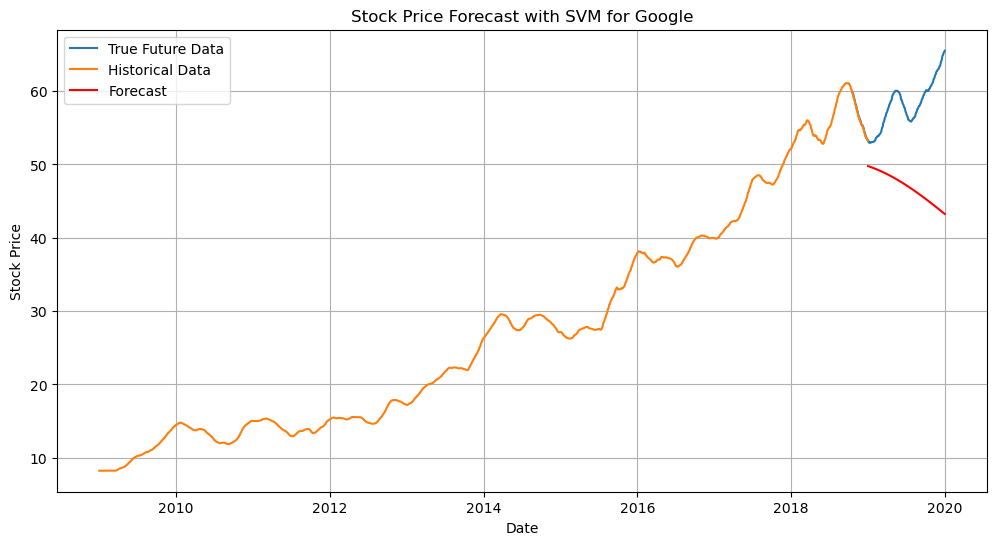

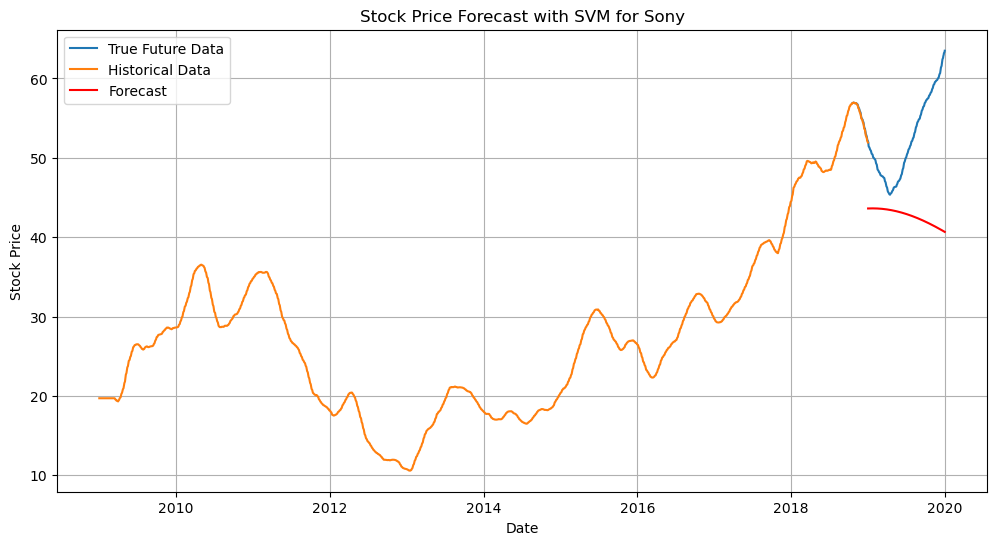

In [36]:
SVM_Function(coke, 'Coke', new_coke)
SVM_Function(pepsi, 'Pepsi', new_pepsi)
SVM_Function(monster, 'Monster', new_monster)
SVM_Function(nestle, 'Nestle', new_nestle)

SVM_Function(apple, 'Apple', new_apple)
SVM_Function(microsoft, 'Microsoft', new_microsoft)
SVM_Function(google, 'Google', new_google)
SVM_Function(sony, 'Sony', new_sony)

In [40]:
def KNN_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Train K-Nearest Neighbors model
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(train.index.to_numpy().reshape(-1, 1), train['MA50'])

    # Predict using KNN model
    predictions = knn_model.predict(test.index.to_numpy().reshape(-1, 1))

    # Evaluate KNN model
    error = mean_squared_error(test['MA50'], predictions)

    # Forecast next year of stock prices
    forecast = knn_model.predict(pd.date_range(start=data.index[-1], periods=365, freq='D').to_numpy().reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with KNN for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


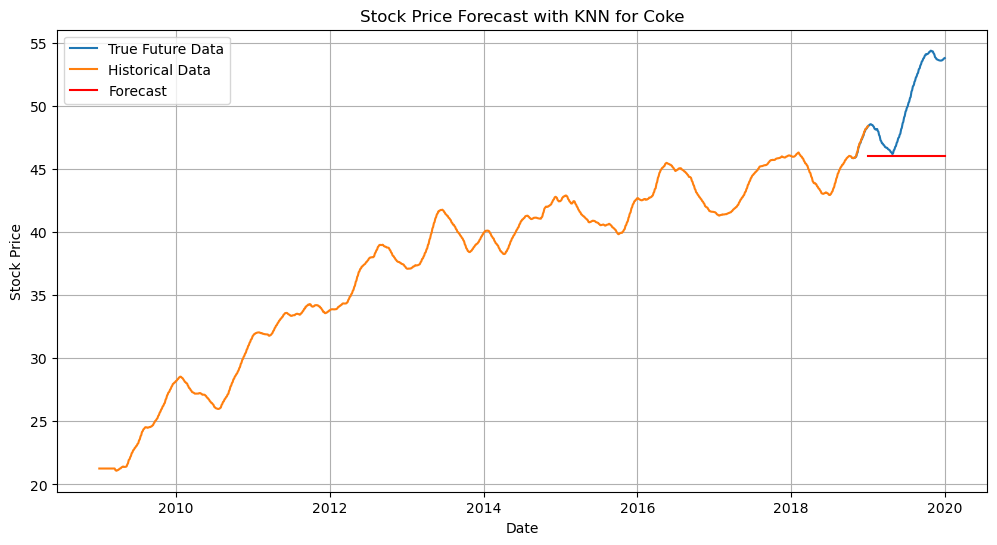

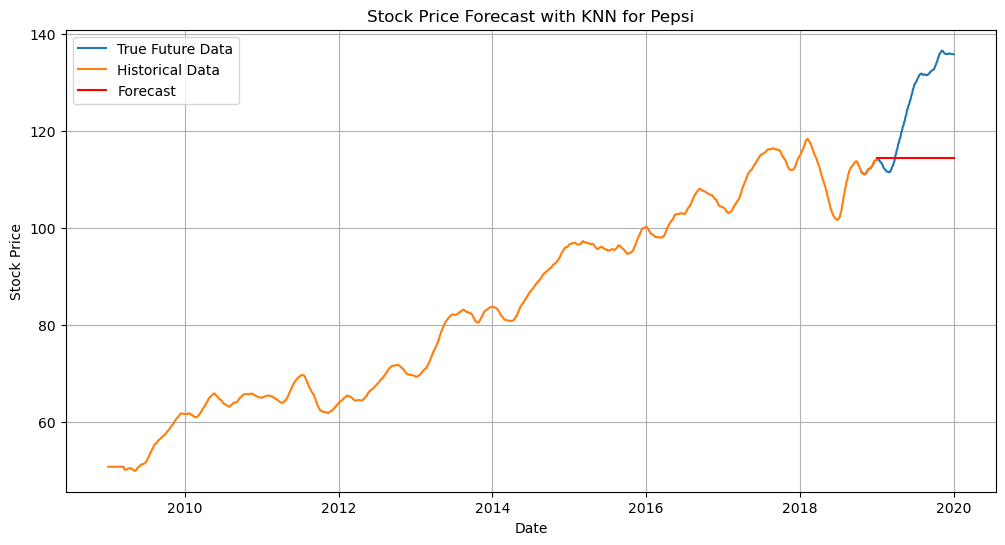

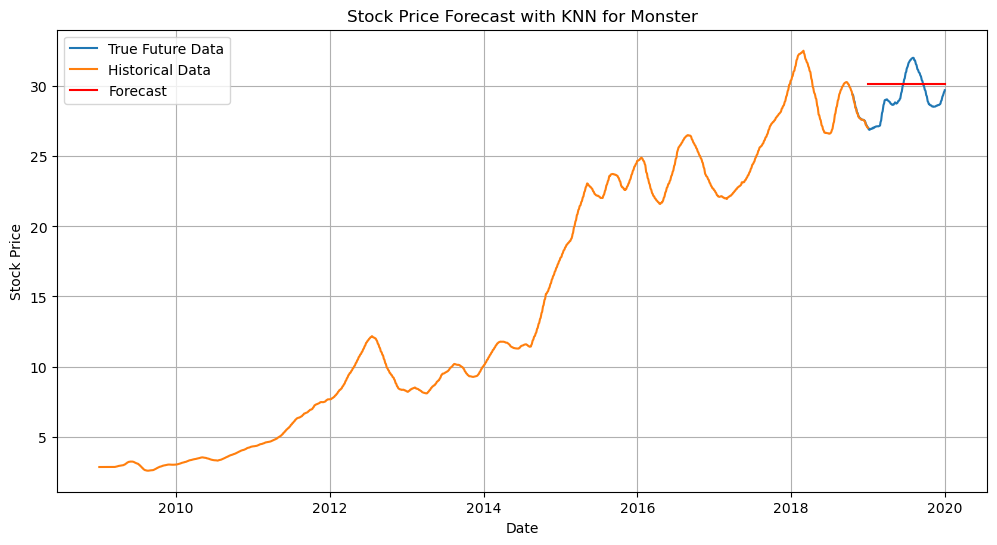

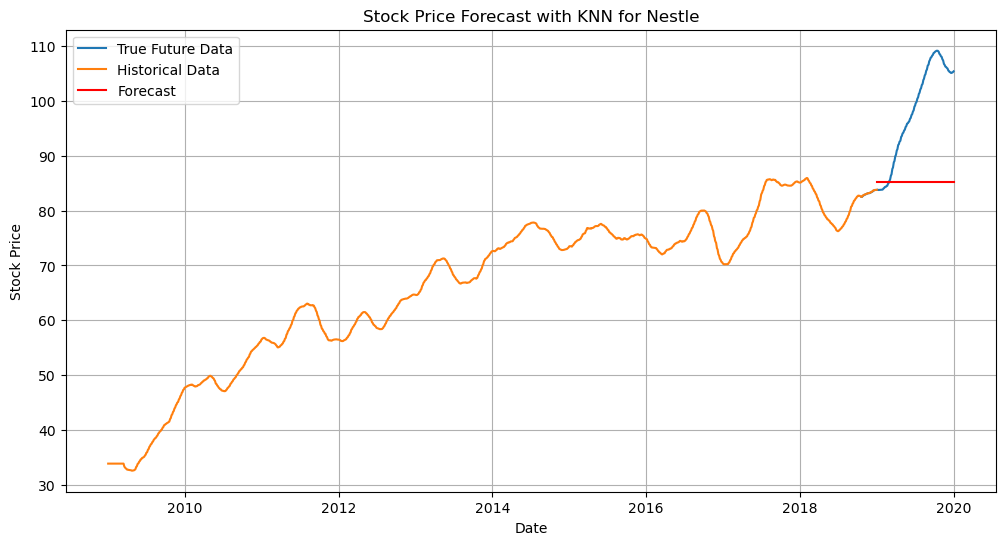

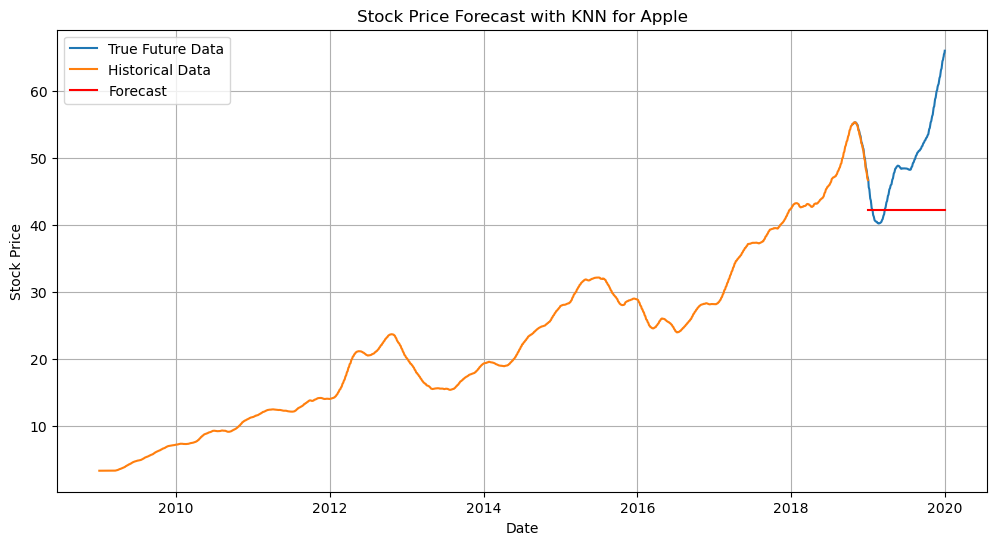

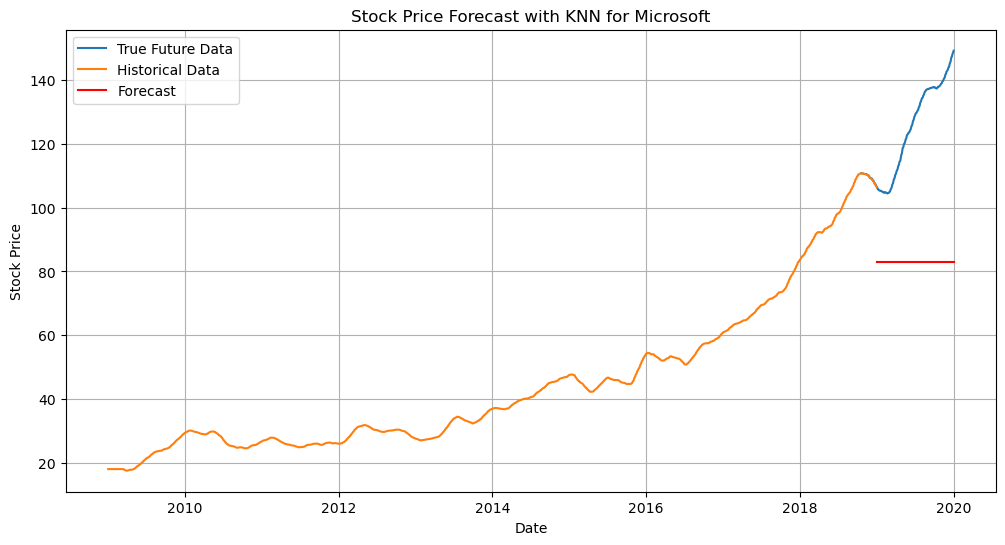

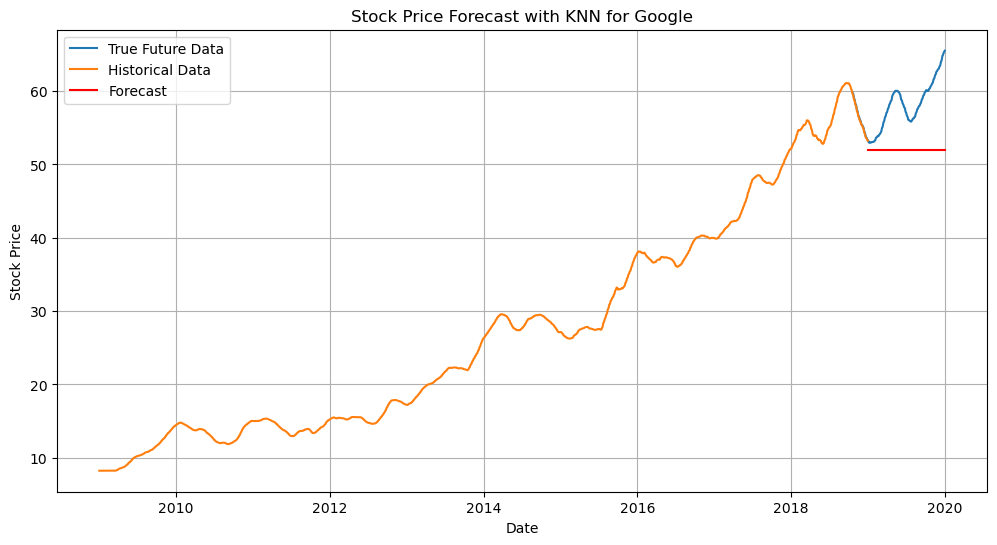

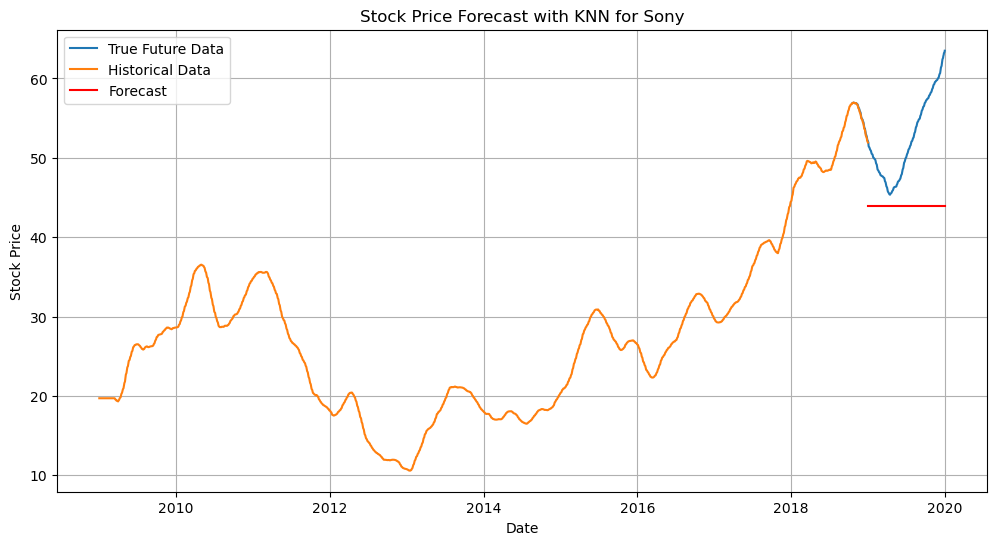

In [42]:
KNN_Function(coke, 'Coke', new_coke)
KNN_Function(pepsi, 'Pepsi', new_pepsi)
KNN_Function(monster, 'Monster', new_monster)
KNN_Function(nestle, 'Nestle', new_nestle)

KNN_Function(apple, 'Apple', new_apple)
KNN_Function(microsoft, 'Microsoft', new_microsoft)
KNN_Function(google, 'Google', new_google)
KNN_Function(sony, 'Sony', new_sony)

In [50]:
def DecisionTree_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Train Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(train.index.to_numpy().reshape(-1, 1), train['MA50'])

    # Predict using Decision Tree model
    predictions = dt_model.predict(test.index.to_numpy().reshape(-1, 1))

    # Evaluate Decision Tree model
    error = mean_squared_error(test['MA50'], predictions)

    # Forecast next year of stock prices
    forecast = dt_model.predict(pd.date_range(start=data.index[-1], periods=365, freq='D').to_numpy().reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with Decision Tree for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


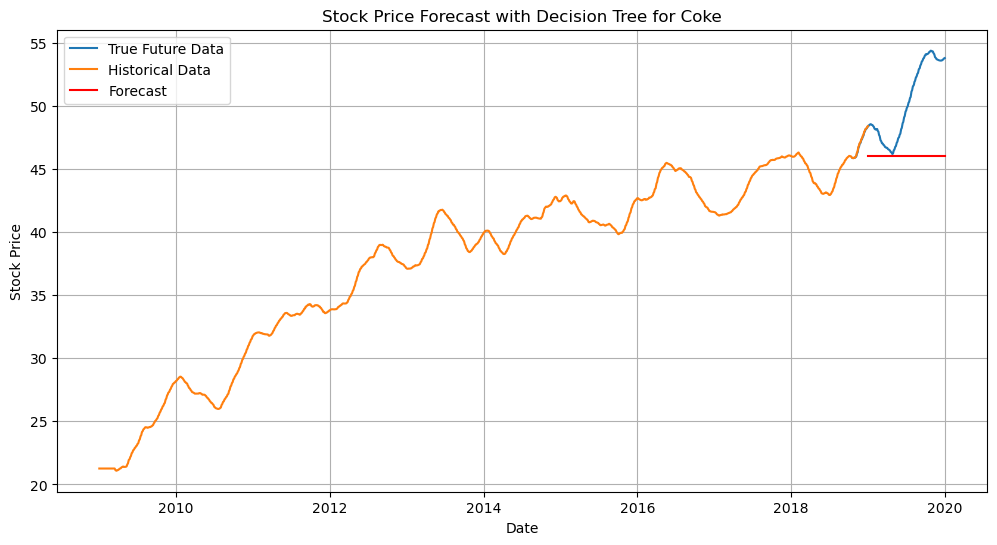

In [51]:
DecisionTree_Function(coke, 'Coke', new_coke)
DecisionTree_Function(pepsi, 'Pepsi', new_pepsi)
DecisionTree_Function(monster, 'Monster', new_monster)
DecisionTree_Function(nestle, 'Nestle', new_nestle)

DecisionTree_Function(apple, 'Apple', new_apple)
DecisionTree_Function(microsoft, 'Microsoft', new_microsoft)
DecisionTree_Function(google, 'Google', new_google)
DecisionTree_Function(sony, 'Sony', new_sony)